In [16]:
import numpy as np  # Import the NumPy library and assign it the alias 'np' for numerical operations.
import pandas as pd  # Import the Pandas library and assign it the alias 'pd' for data manipulation and analysis.
import os  # Import the OS library for interacting with the operating system, like file path manipulation. 

In [17]:
# Load Train Dataset
Train_Provider = pd.read_excel('MFD Train.xlsx', sheet_name='Train_Provider')  # Load Provider Train Data.
Train_Beneficiarydata = pd.read_excel('MFD Train.xlsx', sheet_name='Train_Beneficiary_Data')  # Load Beneficiary Train Data.
Train_Inpatientdata = pd.read_excel('MFD Train.xlsx', sheet_name='Train_Inpatient_Data')  # Load Inpatient Train Data.
Train_Outpatientdata = pd.read_excel('MFD Train.xlsx', sheet_name='Train_Outpatient_Data')  # Load Outpatient Train Data.

In [18]:
# Load Test Dataset
Test_Provider = pd.read_excel("MFD Test.xlsx", sheet_name='Test_Provider')  # Load Provider Test Data.
Test_Beneficiarydata = pd.read_excel("MFD Test.xlsx", sheet_name='Test_Beneficiary_Data')  # Load Beneficiary Test Data.
Test_Inpatientdata = pd.read_excel('MFD Test.xlsx', sheet_name='Test_Inpatient_Data')  # Load Inpatient Test Data.
Test_Outpatientdata = pd.read_excel("MFD Test.xlsx", sheet_name='Test_Outpatient_Data')  # Load Outpatient Test Data.

In [19]:
# Print shapes of train dataframes
print('Shape of Train data :', Train_Provider.shape)
print('Shape of Train_Beneficiarydata data :', Train_Beneficiarydata.shape)  
print('Shape of Train_Inpatientdata data :', Train_Inpatientdata.shape)  
print('Shape of Train_Outpatientdata data :', Train_Outpatientdata.shape)  

# Print shapes of test dataframes
print('Shape of Test data :', Test_Provider.shape)  
print('Shape of Test_Beneficiarydata data :', Test_Beneficiarydata.shape)  
print('Shape of Test_Inpatientdata data :', Test_Inpatientdata.shape)  
print('Shape of Test_Outpatientdata data :', Test_Outpatientdata.shape)  

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


In [20]:
# Check shapes of Train and Test Data

print('Train Shape:', Train_Provider.shape, '\n')  # Print Train_Provider shape.
print('Train Sample:\n', Train_Provider.head(2), '\n')  # Print first 2 rows of Train_Provider.

print('\n Test Shape:', Test_Provider.shape, '\n')  # Print Test_Provider shape.
print('Test Sample: \n', Test_Provider.head(2))  # Print first 2 rows of Test_Provider.

Train Shape: (5410, 2) 

Train Sample:
    Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes 


 Test Shape: (1353, 1) 

Test Sample: 
    Provider
0  PRV51002
1  PRV51006


In [24]:
# Count provider occurrences
provider_counts = Train_Provider['Provider'].value_counts()

# Print the counts
print("Provider Counts:")
print(provider_counts)

# Check for duplicates (any provider appearing more than once)
has_duplicates = (provider_counts > 1).any()

if has_duplicates:
    print("\nDuplicates found in Provider column.")
    print("Providers with multiple entries:")
    print(provider_counts[provider_counts > 1]) # Print the providers that have duplicates.
else:
    print("\nNo duplicates found in Provider column.")

Provider Counts:
Provider
PRV51001    1
PRV55516    1
PRV55527    1
PRV55525    1
PRV55523    1
           ..
PRV53246    1
PRV53245    1
PRV53244    1
PRV53243    1
PRV57763    1
Name: count, Length: 5410, dtype: int64

No duplicates found in Provider column.


In [25]:
# Missing values in Beneficiary data

Train_Beneficiarydata.isna().sum()  # Missing values per column (Train).
Test_Beneficiarydata.isna().sum()   # Missing values per column (Test).

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [26]:
# Beneficiary data types.

Train_Beneficiarydata.dtypes  # Train data types.
Test_Beneficiarydata.dtypes   # Test data types.

BeneID                                     object
DOB                                datetime64[ns]
DOD                                datetime64[ns]
Gender                                      int64
Race                                        int64
RenalDiseaseIndicator                      object
State                                       int64
County                                      int64
NoOfMonths_PartACov                         int64
NoOfMonths_PartBCov                         int64
ChronicCond_Alzheimer                       int64
ChronicCond_Heartfailure                    int64
ChronicCond_KidneyDisease                   int64
ChronicCond_Cancer                          int64
ChronicCond_ObstrPulmonary                  int64
ChronicCond_Depression                      int64
ChronicCond_Diabetes                        int64
ChronicCond_IschemicHeart                   int64
ChronicCond_Osteoporasis                    int64
ChronicCond_rheumatoidarthritis             int64


In [28]:
pd.set_option('future.no_silent_downcasting', True)  # Disable automatic downcasting in Pandas replace operations.

In [29]:
# Chronic conditions: 2 -> 0 (No) ; 1(Yes)
# Gender: 1=Male, 2=Female

Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                               'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                               'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                               'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0, inplace=True)  # Train: Chronic 2->0.

Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1, inplace=True) # Train: Renal 'Y'->1.

Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                              'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                              'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                              'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0, inplace=True) # Test: Chronic 2->0.

Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1, inplace=True) # Test: Renal 'Y'->1.

In [30]:
# View the first 10 rows of Train data
Train_Beneficiarydata.head(10)

BeneID        DOB        DOD  Gender  Race  RenalDiseaseIndicator  \
0  BENE11001 1943-01-01        NaT       1     1                      0   
1  BENE11002 1936-09-01        NaT       2     1                      0   
2  BENE11003 1936-08-01        NaT       1     1                      0   
3  BENE11004 1922-07-01        NaT       1     1                      0   
4  BENE11005 1935-09-01        NaT       1     1                      0   
5  BENE11006 1976-09-01        NaT       2     1                      0   
6  BENE11007 1940-09-01 2009-12-01       1     2                      0   
7  BENE11008 1934-02-01        NaT       2     1                      0   
8  BENE11009 1929-06-01        NaT       1     1                      1   
9  BENE11010 1936-07-01        NaT       2     1                      0   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     39     230                   12                   12  ...   
1     39     280                   12                   12  ...   
2     52     590                   12                   12  ...   
3     39     270                   12                   12  ...   
4     24     680                   12                   12  ...   
5     23     810                   12                   12  ...   
6     45     610                   12                   12  ...   
7     15     140                   12                   12  ...   
8     44     230                   12                   12  ...   
9     41      30                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       0                     0                          0   
2                       0                     0                          1   
3                       0                     1                          1   
4                       0                     1                          0   
5                       0                     0                          0   
6                       0                     1                          0   
7                       0                     1                          0   
8                       0                     1                          0   
9                       0                     1                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         1                                1   
4                         0                                0   
5                         0                                0   
6                         1                                1   
7                         0                                0   
8                         0                                0   
9                         1                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   0                         0                      0   
2                   0                         0                      0   
3                   0                         0                      0   
4                   0                         0                      0   
5                   0                         0                      0   
6                   0                         0                      0   
7                   0                         0                      0   
8                   0                         0                      0   
9                   0                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0         

In [31]:
# View the first 10 rows of Test data
Test_Beneficiarydata.head(10)

BeneID        DOB        DOD  Gender  Race  RenalDiseaseIndicator  \
0  BENE11001 1943-01-01        NaT       1     1                      0   
1  BENE11007 1940-09-01 2009-12-01       1     2                      0   
2  BENE11010 1936-07-01        NaT       2     1                      0   
3  BENE11011 1914-03-01        NaT       2     2                      0   
4  BENE11014 1938-04-01        NaT       2     1                      1   
5  BENE11016 1919-09-01        NaT       2     2                      0   
6  BENE11017 1940-06-01        NaT       2     1                      0   
7  BENE11019 1924-05-01        NaT       1     3                      0   
8  BENE11021 1927-12-01        NaT       1     3                      0   
9  BENE11026 1938-04-01        NaT       1     1                      0   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     39     230                   12                   12  ...   
1     45     610                   12                   12  ...   
2     41      30                   12                   12  ...   
3      1     360                   12                   12  ...   
4     45     780                   12                   12  ...   
5     34     400                   12                   12  ...   
6     31     270                   12                   12  ...   
7      7      50                   12                   12  ...   
8      7      20                   12                   12  ...   
9     22      20                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       0                     1                          0   
2                       0                     1                          1   
3                       1                     1                          0   
4                       1                     0                          1   
5                       0                     1                          1   
6                       0                     1                          1   
7                       1                     1                          1   
8                       1                     1                          1   
9                       0                     0                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         1                                1   
2                         1                                0   
3                         0                                1   
4                         0                                0   
5                         1                                0   
6                         0                                1   
7                         1                                0   
8                         1                                1   
9                         0                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   0                         0                      0   
2                   0                         0                      0   
3                   1                      5000                   1068   
4                   0                     21260                   2136   
5                   1                         0                      0   
6                   1                     22000                   2136   
7                   0                         0                      0   
8                   0                         0                      0   
9                   0                      2000                   1068   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0         

In [ ]:
# Create Age column
Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'], format='%d/%m/%Y')  # Convert DOB to datetime (Train).

Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'], format='%d/%m/%Y')  # Convert DOD to datetime (Train).
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days) / 365)  # Calculate Age (Train).

Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'], format='%d/%m/%Y')  # Convert DOB to datetime (Test).
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'], format='%d/%m/%Y')  # Convert DOD to datetime (Test).
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days) / 365)  # Calculate Age (Test).

In [39]:
Train_Beneficiarydata.head(2)
Test_Beneficiarydata.head(2)

BeneID        DOB        DOD  Gender  Race  RenalDiseaseIndicator  \
0  BENE11001 1943-01-01        NaT       1     1                      0   
1  BENE11007 1940-09-01 2009-12-01       1     2                      0   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     39     230                   12                   12  ...   
1     45     610                   12                   12  ...   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                     1                          1                         0   
1                     1                          0                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                1                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                      1490   

   OPAnnualDeductibleAmt   Age  
0                     70   NaN  
1                    160  69.0  

[2 rows x 26 columns]

In [ ]:
# Train: Check whether the DOD is missing or not.
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.isna(), 'WhetherDead'] = 0  # 0 if DOD missing (alive).
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(), 'WhetherDead'] = 1  # 1 if DOD present (dead).
Train_Beneficiarydata.loc[:, 'WhetherDead'].head(7)  # Display first 7 values of 'WhetherDead'.

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
Name: WhetherDead, dtype: float64

In [43]:
# Test: Check whether the DOD is missing or not.
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'WhetherDead']=0  # 0 if DOD missing (alive).
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'WhetherDead']=1 # 1 if DOD present (dead).
Test_Beneficiarydata.loc[:,'WhetherDead'].head(3) # Display first 7 values of 'WhetherDead'.

0    0.0
1    1.0
2    0.0
Name: WhetherDead, dtype: float64

In [44]:
# checking the missing values
Train_Inpatientdata.isna().sum()  # Missing values (Train).
Test_Inpatientdata.isna().sum()   # Missing values (Test).

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

In [51]:
# Inpatient data types.

Train_Inpatientdata.dtypes  # Train data types.
Test_Inpatientdata.dtypes   # Test data types.

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
AdmissionDt               datetime64[ns]
ClmAdmitDiagnosisCode             object
DeductibleAmtPaid                float64
DischargeDt               datetime64[ns]
DiagnosisGroupCode                object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode

In [52]:
# Compute AdmitForDays for Train_Inpatientdata
Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'], format='%Y-%m-%d')  # Convert AdmissionDt to datetime.
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'], format='%Y-%m-%d')  # Convert DischargeDt to datetime.
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days) + 1  # Calculate AdmitForDays.

In [53]:
# Compute AdmitForDays for Test_Inpatientdata
Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'], format='%Y-%m-%d')  # Convert AdmissionDt to datetime.
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'], format='%Y-%m-%d')  # Convert DischargeDt to datetime.
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days) + 1  # Calculate AdmitForDays.

In [54]:
# Check AdmitForDays min/max (Train/Test)
print('Min AdmitForDays Train:- ', Train_Inpatientdata.AdmitForDays.min())  # Min days (Train).
print('Max AdmitForDays Train:- ', Train_Inpatientdata.AdmitForDays.max())  # Max days (Train).
Train_Inpatientdata.AdmitForDays.isnull().sum()  # Null days (Train).

print('Min AdmitForDays Test:- ', Test_Inpatientdata.AdmitForDays.min())  # Min days (Test).
print('Max AdmitForDays Test:- ', Test_Inpatientdata.AdmitForDays.max())  # Max days (Test).
Test_Inpatientdata.AdmitForDays.isnull().sum()  # Null days (Test).

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

In [55]:
#checking null values
Train_Outpatientdata.isna().sum()  # Nulls (Train).
Test_Outpatientdata.isna().sum()   # Nulls (Test).

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [56]:
# Outpatient data types.

Train_Outpatientdata.dtypes  # Train data types.
Test_Outpatientdata.dtypes   # Test data types.

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode_1               float64
ClmProcedureCode_2               float64
ClmProcedureCode_3               float64
ClmProcedureCode_4               float64
ClmProcedureCode_5               float64
ClmProcedureCode

In [57]:
# Check dataset shapes after variable additions
print('Shape of Train data :', Train_Provider.shape)  # Train_Provider shape.
print('Shape of Train_Beneficiarydata data :', Train_Beneficiarydata.shape)  # Train_Beneficiary shape.
print('Shape of Train_Inpatientdata data :', Train_Inpatientdata.shape)  # Train_Inpatient shape.
print('Shape of Train_Outpatientdata data :', Train_Outpatientdata.shape)  # Train_Outpatient shape.

print('Shape of Test data :', Test_Provider.shape)  # Test_Provider shape.
print('Shape of Test_Beneficiarydata data :', Test_Beneficiarydata.shape)  # Test_Beneficiary shape.
print('Shape of Test_Inpatientdata data :', Test_Inpatientdata.shape)  # Test_Inpatient shape.
print('Shape of Test_Outpatientdata data :', Test_Outpatientdata.shape)  # Test_Outpatient shape.

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 27)
Shape of Train_Inpatientdata data : (40474, 31)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 27)
Shape of Test_Inpatientdata data : (9551, 31)
Shape of Test_Outpatientdata data : (125841, 27)


In [58]:
merge_keys = Train_Outpatientdata.columns  # Get Outpatient column names.
print(merge_keys)  # Print column names.

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


In [60]:
# Merge the Outpatient and Inpatient data
Test_Allpatientdata = pd.merge(Test_Outpatientdata, Test_Inpatientdata,
                               left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
                                        'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
                                        'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                                        'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                                        'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                                        'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
                                        'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                                        'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
                                        'ClmAdmitDiagnosisCode'],
                               right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
                                         'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
                                         'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                                         'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                                         'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                                         'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
                                         'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                                         'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
                                         'ClmAdmitDiagnosisCode'],
                               how='outer')  # Merge Test Outpatient and Inpatient data (outer join).

Train_Allpatientdata = pd.merge(Train_Outpatientdata, Train_Inpatientdata,
                                left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
                                         'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
                                         'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                                         'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                                         'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                                         'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
                                         'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                                         'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
                                         'ClmAdmitDiagnosisCode'],
                                right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
                                          'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
                                          'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                                          'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                                          'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                                          'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
                                          'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                                          'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
                                          'ClmAdmitDiagnosisCode'],
                                how='outer')  # Merge Train Outpatient and Inpatient data (outer join).

In [61]:
# Merged files shape.
print('Train_Allpatientdata', Train_Allpatientdata.shape)  # Print Train shape.
print('Test_Allpatientdata', Test_Allpatientdata.shape)   # Print Test shape.

Train_Allpatientdata (558211, 31)
Test_Allpatientdata (135392, 31)


In [65]:
Train_Allpatientdata.head()

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE100000  CLM126832   2009-01-08 2009-01-08  PRV57172   
1  BENE100000  CLM351838   2009-05-10 2009-05-10  PRV57172   
2  BENE100001  CLM229075   2009-03-05 2009-03-05  PRV55158   
3  BENE100001  CLM258631   2009-03-21 2009-03-21  PRV54966   
4  BENE100001  CLM332544   2009-04-30 2009-05-02  PRV54890   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      50          PHY383401                NaN   
1                      70          PHY370909                NaN   
2                      70          PHY383478                NaN   
3                      70          PHY347511                NaN   
4                      90          PHY343317          PHY408367   

  OtherPhysician ClmDiagnosisCode_1  ... ClmProcedureCode_3  \
0            NaN              79678  ...                NaN   
1      PHY363377              71656  ...                NaN   
2            NaN              64881  ...                NaN   
3            NaN              36401  ...                NaN   
4      PHY408367               2948  ...                NaN   

  ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6 DeductibleAmtPaid  \
0                NaN                NaN                NaN               0.0   
1                NaN                NaN                NaN               0.0   
2                NaN                NaN                NaN               0.0   
3                NaN                NaN                NaN               0.0   
4                NaN                NaN                NaN               0.0   

  ClmAdmitDiagnosisCode AdmissionDt DischargeDt DiagnosisGroupCode  \
0                   NaN         NaT         NaT                NaN   
1                   NaN         NaT         NaT                NaN   
2                 64880         NaT         NaT                NaN   
3                 36401         NaT         NaT                NaN   
4                 78009         NaT         NaT                NaN   

   AdmitForDays  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 31 columns]

In [66]:
Test_Allpatientdata.head()

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE100001  CLM129501   2009-01-10 2009-01-10  PRV52050   
1  BENE100002  CLM623189   2009-10-10 2009-10-10  PRV52083   
2  BENE100004  CLM546697   2009-08-26 2009-09-15  PRV53275   
3  BENE100004   CLM63603   2009-08-12 2009-08-17  PRV52959   
4  BENE100010  CLM299397   2009-04-12 2009-04-12  PRV52050   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    1100          PHY364771                NaN   
1                      60          PHY402651                NaN   
2                    1500          PHY364921                NaN   
3                   11000          PHY410241                NaN   
4                      60          PHY342001                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmProcedureCode_3  \
0            NaN               V074  ...                NaN   
1      PHY315572              V5867  ...                NaN   
2      PHY364921              V5631  ...                NaN   
3            NaN              69514  ...                NaN   
4      PHY359807               V704  ...                NaN   

  ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6 DeductibleAmtPaid  \
0                NaN                NaN                NaN               0.0   
1                NaN                NaN                NaN               0.0   
2                NaN                NaN                NaN             200.0   
3                NaN                NaN                NaN            1068.0   
4                NaN                NaN                NaN               0.0   

  ClmAdmitDiagnosisCode AdmissionDt DischargeDt DiagnosisGroupCode  \
0                   NaN         NaT         NaT                NaN   
1                   NaN         NaT         NaT                NaN   
2                   NaN         NaT         NaT                NaN   
3                   539  2009-08-12  2009-08-17                579   
4                 V7283         NaT         NaT                NaN   

   AdmitForDays  
0           NaN  
1           NaN  
2           NaN  
3           6.0  
4           NaN  

[5 rows x 31 columns]

In [71]:
# Merging All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
Train_AllPatientDetailsdata = pd.merge(Train_Allpatientdata, Train_Beneficiarydata, on='BeneID', how='inner')  # Merge Train data.
Test_AllPatientDetailsdata = pd.merge(Test_Allpatientdata, Test_Beneficiarydata, on='BeneID', how='inner')   # Merge Test data.

In [73]:
# Train Print shape of data 
print('Shape of All Patient Details Train : ',Train_AllPatientDetailsdata.shape)
Train_AllPatientDetailsdata.head()

Shape of All Patient Details Train :  (558211, 57)


BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE100000  CLM126832   2009-01-08 2009-01-08  PRV57172   
1  BENE100000  CLM351838   2009-05-10 2009-05-10  PRV57172   
2  BENE100001  CLM229075   2009-03-05 2009-03-05  PRV55158   
3  BENE100001  CLM258631   2009-03-21 2009-03-21  PRV54966   
4  BENE100001  CLM332544   2009-04-30 2009-05-02  PRV54890   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      50          PHY383401                NaN   
1                      70          PHY370909                NaN   
2                      70          PHY383478                NaN   
3                      70          PHY347511                NaN   
4                      90          PHY343317          PHY408367   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_IschemicHeart  \
0            NaN              79678  ...                         1   
1      PHY363377              71656  ...                         1   
2            NaN              64881  ...                         1   
3            NaN              36401  ...                         1   
4      PHY408367               2948  ...                         1   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        0                               0                  0   
1                        0                               0                  0   
2                        1                               0                  1   
3                        1                               0                  1   
4                        1                               0                  1   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                        0                     0                      120   
1                        0                     0                      120   
2                        0                     0                     2530   
3                        0                     0                     2530   
4                        0                     0                     2530   

  OPAnnualDeductibleAmt Age  WhetherDead  
0                    30 NaN          0.0  
1                    30 NaN          0.0  
2                   540 NaN          0.0  
3                   540 NaN          0.0  
4                   540 NaN          0.0  

[5 rows x 57 columns]

In [74]:
#Test Print shape of data 
print('Shape of All Patient Details Test : ',Test_AllPatientDetailsdata.shape)
Test_AllPatientDetailsdata.head()

Shape of All Patient Details Test :  (135392, 57)


BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE100001  CLM129501   2009-01-10 2009-01-10  PRV52050   
1  BENE100002  CLM623189   2009-10-10 2009-10-10  PRV52083   
2  BENE100004  CLM546697   2009-08-26 2009-09-15  PRV53275   
3  BENE100004   CLM63603   2009-08-12 2009-08-17  PRV52959   
4  BENE100010  CLM299397   2009-04-12 2009-04-12  PRV52050   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    1100          PHY364771                NaN   
1                      60          PHY402651                NaN   
2                    1500          PHY364921                NaN   
3                   11000          PHY410241                NaN   
4                      60          PHY342001                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_IschemicHeart  \
0            NaN               V074  ...                         1   
1      PHY315572              V5867  ...                         1   
2      PHY364921              V5631  ...                         1   
3            NaN              69514  ...                         1   
4      PHY359807               V704  ...                         1   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        1                               0                  1   
1                        0                               0                  1   
2                        1                               0                  0   
3                        1                               0                  0   
4                        0                               1                  0   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                        0                     0                     2530   
1                    12250                  1068                     1760   
2                    14270                  2136                     1880   
3                    14270                  2136                     1880   
4                    13400                  2136                     1050   

  OPAnnualDeductibleAmt Age  WhetherDead  
0                   540 NaN          0.0  
1                   660 NaN          0.0  
2                   700 NaN          0.0  
3                   700 NaN          0.0  
4                   760 NaN          0.0  

[5 rows x 57 columns]

In [ ]:
# Merge patient data with fradulent providers details data with "Provider" as joining key for inner join

Train_ProviderWithPatientDetailsdata=pd.merge(Train_Provider,Train_AllPatientDetailsdata,on='Provider')

Test_ProviderWithPatientDetailsdata=pd.merge(Test_Provider,Test_AllPatientDetailsdata,on='Provider')

In [76]:
# Print the shape of dataset 
print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetailsdata.shape)
Train_ProviderWithPatientDetailsdata.head()

Shape of Train Provider with Patient Details data :- (558211, 58)


Provider PotentialFraud      BeneID    ClaimID ClaimStartDt ClaimEndDt  \
0  PRV51001             No  BENE102690   CLM49733   2009-05-04 2009-05-18   
1  PRV51001             No  BENE106078  CLM419490   2009-06-16 2009-06-16   
2  PRV51001             No   BENE11727  CLM733300   2009-12-17 2009-12-17   
3  PRV51001             No  BENE123416  CLM172987   2009-02-02 2009-02-02   
4  PRV51001             No  BENE126477  CLM361230   2009-05-15 2009-05-15   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   42000          PHY383193          PHY378091   
1                      90          PHY345302                NaN   
2                      20          PHY383007                NaN   
3                     100          PHY345302                NaN   
4                     200          PHY354616          PHY405310   

  OtherPhysician  ... ChronicCond_IschemicHeart ChronicCond_Osteoporasis  \
0      PHY389113  ...                         1                        0   
1            NaN  ...                         1                        0   
2      PHY383007  ...                         1                        0   
3      PHY345302  ...                         1                        0   
4      PHY405310  ...                         1                        0   

  ChronicCond_rheumatoidarthritis ChronicCond_stroke IPAnnualReimbursementAmt  \
0                               1                  0                   143800   
1                               0                  0                        0   
2                               0                  0                        0   
3                               0                  0                        0   
4                               1                  0                        0   

  IPAnnualDeductibleAmt OPAnnualReimbursementAmt OPAnnualDeductibleAmt Age  \
0                  4272                      880                    70 NaN   
1                     0                      190                    20 NaN   
2                     0                      300                   110 NaN   
3                     0                     3600                    10 NaN   
4                     0                      690                   150 NaN   

  WhetherDead  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 58 columns]

In [77]:
# Print the shape of dataset
print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetailsdata.shape)
Test_ProviderWithPatientDetailsdata.head()

Shape of Test Provider with Patient Details data :- (135392, 57)


Provider      BeneID    ClaimID ClaimStartDt ClaimEndDt  \
0  PRV51002  BENE101165  CLM304833   2009-04-15 2009-04-15   
1  PRV51002  BENE102518  CLM529049   2009-08-16 2009-08-16   
2  PRV51002  BENE105000  CLM284553   2009-04-04 2009-04-04   
3  PRV51002  BENE105481  CLM307569   2009-04-16 2009-04-16   
4  PRV51002  BENE107412  CLM250288   2009-03-16 2009-03-16   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      70          PHY410547                NaN   
1                      20          PHY315513          PHY418464   
2                     100          PHY417749                NaN   
3                     200          PHY390461                NaN   
4                      30          PHY420082                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_IschemicHeart  \
0            NaN               2722  ...                         1   
1      PHY354831              42732  ...                         1   
2            NaN              59781  ...                         1   
3            NaN               5161  ...                         0   
4            NaN                185  ...                         1   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        1                               0                  0   
1                        0                               0                  0   
2                        1                               0                  0   
3                        0                               0                  0   
4                        0                               0                  0   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                        0                     0                     2230   
1                     3000                  1068                      680   
2                        0                     0                     3420   
3                        0                     0                      880   
4                     5060                  1068                     7230   

  OPAnnualDeductibleAmt Age  WhetherDead  
0                    50 NaN          0.0  
1                   160 NaN          0.0  
2                   370 NaN          0.0  
3                   450 NaN          0.0  
4                   760 NaN          0.0  

[5 rows x 57 columns]

In [80]:
# Check missing value (%)
print('% of Missing Vlaues:\n')
Train_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Train_ProviderWithPatientDetailsdata)

% of Missing Vlaues:



Provider                             0.000000
PotentialFraud                       0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                  90.425843
ClmDiagnosisCode_9                  92.509105
ClmDiagnosisCode_10                 99.102490
ClmProcedureCode_1                  95.824160
ClmProcedureCode_2                

In [81]:
# Check missing value (%)
print('% of Missing Vlaues:\n')
Test_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Test_ProviderWithPatientDetailsdata)

% of Missing Vlaues:



Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                  90.603581
ClmDiagnosisCode_9                  92.705625
ClmDiagnosisCode_10                 99.150615
ClmProcedureCode_1                  95.962095
ClmProcedureCode_2                  99.067153
ClmProcedureCode_3                

In [83]:
# dtypes
Train_ProviderWithPatientDetailsdata.dtypes

Provider                                   object
PotentialFraud                             object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object


In [84]:
#dtype
Test_ProviderWithPatientDetailsdata.dtypes

Provider                                   object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object
ClmProcedureCode_1                        float64


In [ ]:
import seaborn as sns  # Import Seaborn for plotting.

import matplotlib.pyplot as plt  # Import Matplotlib for plotting.

Percent Distribution:
 PotentialFraud
No     61.878931
Yes    38.121069
Name: count, dtype: float64


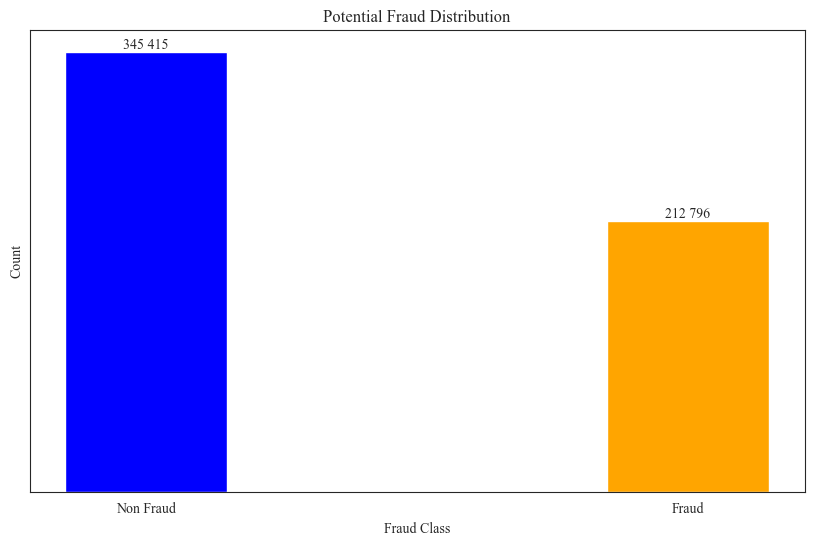

In [126]:
# Frequencies of Fraud/Non-fraud claims by patients, Train
Data_Train = Train_ProviderWithPatientDetailsdata  # Load data.

sns.set_style('white', rc={'figure.figsize': (12, 8)})  # Set plot style.

count_classes_train = Data_Train['PotentialFraud'].value_counts()  # Count fraud/non-fraud.

print("Percent Distribution:\n", count_classes_train * 100 / len(Data_Train))  # Print percentages.

LABELS = ["Non Fraud", "Fraud"]  # Plot labels.

plt.figure(figsize=(10, 6))  # Figure size.

bars = plt.bar(count_classes_train.index, count_classes_train, width=0.3, color=['blue', 'orange'])  # Bar plot.

plt.title("Potential Fraud Distribution", fontname="Times New Roman")  # Plot title.

plt.xticks(range(2), LABELS, fontname="Times New Roman")  # x-axis labels.

plt.xlabel("Fraud Class", fontname="Times New Roman")  # x-axis label.

plt.ylabel("Count", fontname="Times New Roman")  # y-axis label.

plt.yticks([])  # Remove y-ticks.

for bar in bars:  # Bar labels.

    yval = bar.get_height()  # Bar height.

    formatted_yval = f'{int(yval):,}'.replace(",", " ")  # Format labels.

    plt.text(bar.get_x() + bar.get_width() / 2, yval, formatted_yval, ha='center', va='bottom', fontname="Times New Roman")  # Add labels.

plt.savefig('PotentialFraudDistributionInMergedData_Customized')  # Save plot.

plt.show()  # Show plot.



Percent Distribution:
 PotentialFraud
No     90.64695
Yes     9.35305
Name: count, dtype: float64


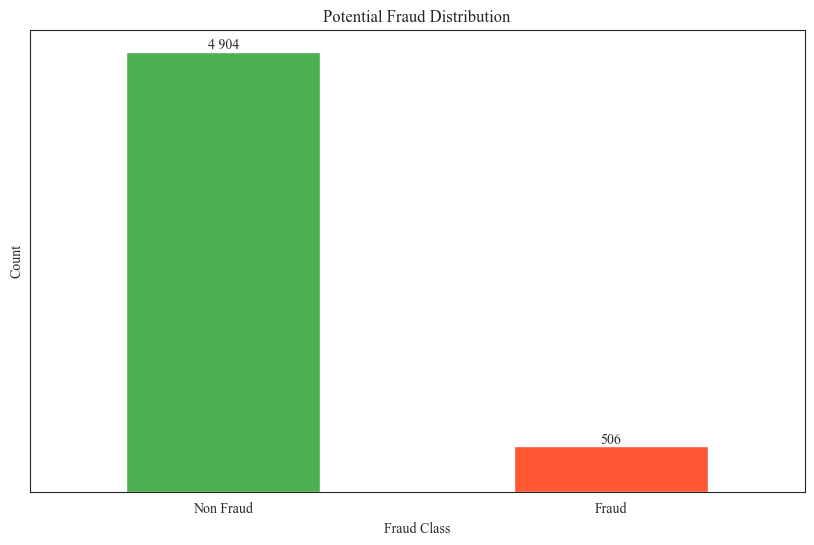

In [127]:
# Frequencies of Fraud/Non-fraud claims by Providers
count_classes_provider = Train_Provider['PotentialFraud'].value_counts(sort=True)  # Count fraud/non-fraud.
print("Percent Distribution:\n", count_classes_provider * 100 / len(Train_Provider))  # Print percentages.

LABELS = ["Non Fraud", "Fraud"]  # Plot labels.

count_classes_provider.plot(kind='bar', rot=0, figsize=(10, 6), color=['#4CAF50', '#FF5733'])  # Bar plot with green/orange.

plt.title("Potential Fraud Distribution", fontname="Times New Roman")  # Plot title.
plt.xticks(range(2), LABELS, fontname="Times New Roman")  # x-axis labels.
plt.xlabel("Fraud Class", fontname="Times New Roman")  # x-axis label.
plt.ylabel("Count", fontname="Times New Roman")  # y-axis label.
plt.yticks([])  # Remove y-ticks.

for bar in plt.gca().patches:  # Bar labels.
    yval = bar.get_height()  # Bar height.
    formatted_yval = f'{int(yval):,}'.replace(",", " ")  # Format labels.
    plt.text(bar.get_x() + bar.get_width() / 2, yval, formatted_yval, ha='center', va='bottom', fontname="Times New Roman")  # Add labels.

plt.savefig('PotentialFraudDistributionInProvidersData_Customized')  # Save plot.
plt.show()  # Show plot.

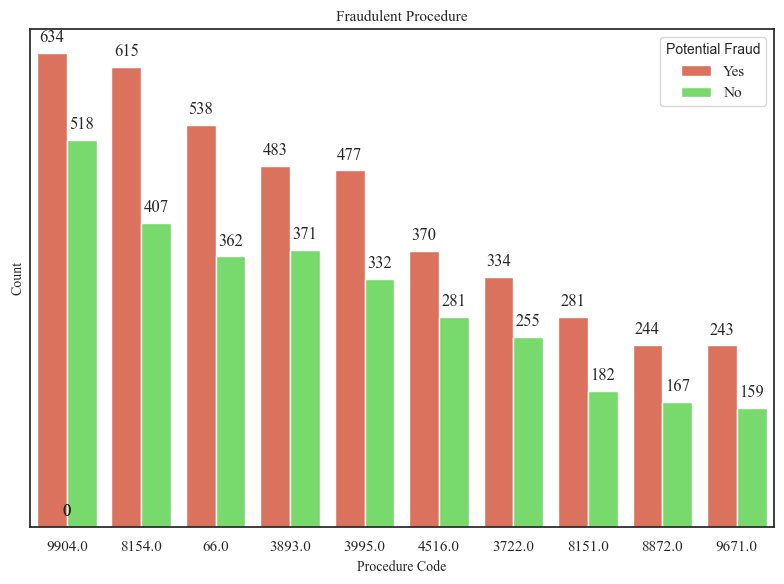

<Figure size 1200x800 with 0 Axes>

In [158]:
# Top 10 Fraudulent Procedures

plt.figure(figsize=(8, 6), facecolor='white')  # Set figure size and background.

ax = sns.countplot(x='ClmProcedureCode_1', hue='PotentialFraud', data=Data_Train,  # Create count plot.
                   order=Data_Train.ClmProcedureCode_1.value_counts().iloc[:10].index,
                   palette={'No': '#6AEB5B', 'Yes': '#F06449'})  # Order by top 10, stronger legend colors.

plt.title('Fraudulent Procedure', fontsize=11, fontname='Times New Roman')  # Concise title.
plt.xlabel('Procedure Code', fontsize=10, fontname='Times New Roman')  # Improved x-axis label.
plt.ylabel('Count', fontsize=10, fontname='Times New Roman')
plt.yticks([])  # Remove y-axis numbers.

# Set x-axis tick labels to Times New Roman
plt.xticks(fontname='Times New Roman')

for p in ax.patches:  # Add data labels.
    height = p.get_height()
    ax.annotate(f'{int(height):,}',  # Format with spaces.
                (p.get_x() + p.get_width() / 2., height),  # Position.
                ha='center', va='bottom',  # Alignment.
                xytext=(0, 5), textcoords='offset points',
                fontname='Times New Roman')

plt.legend(title='Potential Fraud', title_fontsize='10', prop={'family': 'Times New Roman'})

plt.tight_layout() #Add this line
plt.show()  # Display plot.

plt.savefig('FraudulentProcedureCounts')  # Save plot.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15252\3318379108.py:15: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.countplot(


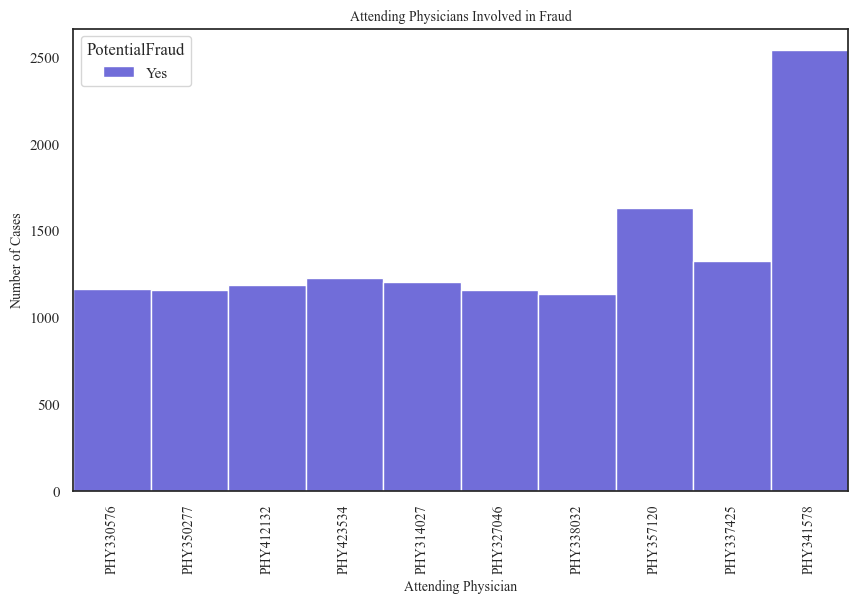

In [182]:
# Top-10 Attending Physicians involved in Healthcare Fraud
# Set figure size and font style
sns.set(rc={'figure.figsize': (10, 6), 'font.family': 'Times New Roman'}, style='white')

# Count top 20 Attending Physicians
top_10_physicians = Data_Train.AttendingPhysician.value_counts().iloc[:10].index

# Create a copy of the filtered data to avoid SettingWithCopyWarning
filtered_data = Data_Train[Data_Train['AttendingPhysician'].isin(top_10_physicians)].copy()

# Ensure categorical order for proper spacing
filtered_data.loc[:, 'AttendingPhysician'] = pd.Categorical(filtered_data['AttendingPhysician'], categories=top_10_physicians, ordered=True)

# Plot Top-20 Attending Physicians involved in Healthcare Fraud
ax = sns.countplot(
    x='AttendingPhysician', hue='PotentialFraud', data=filtered_data,
    dodge=True, width=1, palette=["#605BEB", "#ff7f0e"]   # Uniform bar width
)

# Customize plot
plt.title('Attending Physicians Involved in Fraud', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Attending Physician", fontsize=10)
plt.ylabel("Number of Cases", fontsize=10)  # Show y-axis scale
plt.xticks(ticks=range(len(top_10_physicians)), labels=top_10_physicians, ha='right')

# Adjust x-axis spacing
plt.xticks(rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

# Save and display the plot
plt.savefig('TopAttendingPhysiciansInvolvedInHealthcareFraud.png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 1400x700 with 0 Axes>

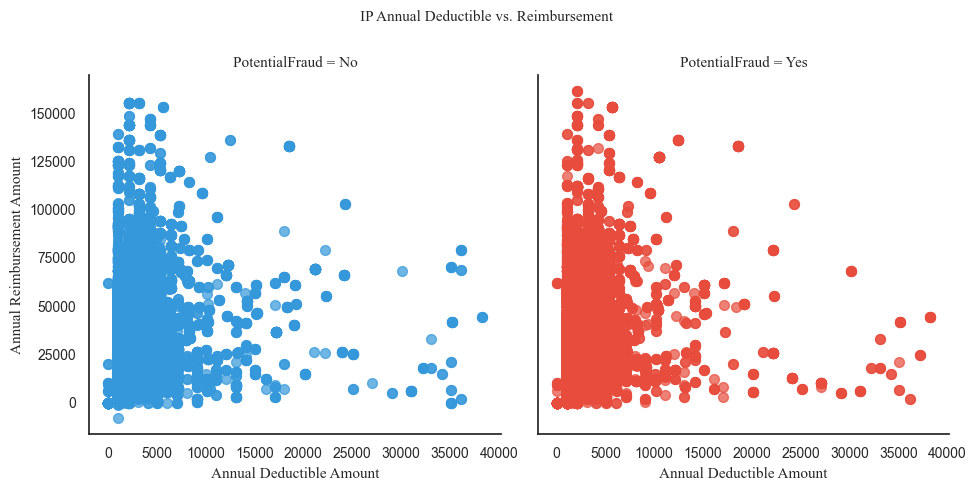

In [189]:
# IP Annual Deductible vs. Reimbursement in Fraud/No Fraud
plt.figure(figsize=(14, 7), facecolor='white')  # Set figure size and background

sns.lmplot(x='IPAnnualDeductibleAmt', y='IPAnnualReimbursementAmt', hue='PotentialFraud',
           col='PotentialFraud', fit_reg=False, data=Data_Train,
           palette={'No': '#3498db', 'Yes': '#e74c3c'},  # Custom colors
           scatter_kws={'alpha': 0.7, 's': 50})  # Adjust scatter plot appearance

plt.subplots_adjust(top=0.85)  # Adjust subplot to add title

plt.suptitle('IP Annual Deductible vs. Reimbursement', fontsize=11, fontname='Times New Roman')  # Title

for ax in plt.gcf().axes:  # Iterate through axes
    ax.set_xlabel('Annual Deductible Amount', fontsize=11, fontname='Times New Roman')  # X-axis label
    ax.set_ylabel('Annual Reimbursement Amount', fontsize=11, fontname='Times New Roman')  # Y-axis label
    ax.set_title(ax.get_title(), fontsize=11, fontname='Times New Roman')  # Subplot titles
    ax.tick_params(axis='both', labelsize=10)  # Tick label size

plt.savefig('IPAnnualDeductibleVsReimbursement_Enhanced')
plt.show()

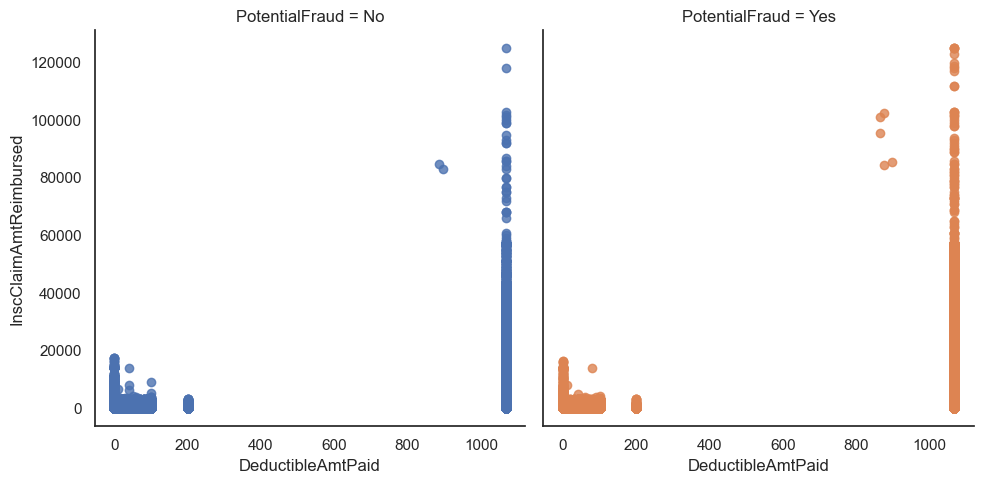

In [188]:
sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=data)


plt.savefig('DeductibleAmtPaidandInsClaimAmtReimbursed')

<Figure size 1200x600 with 0 Axes>

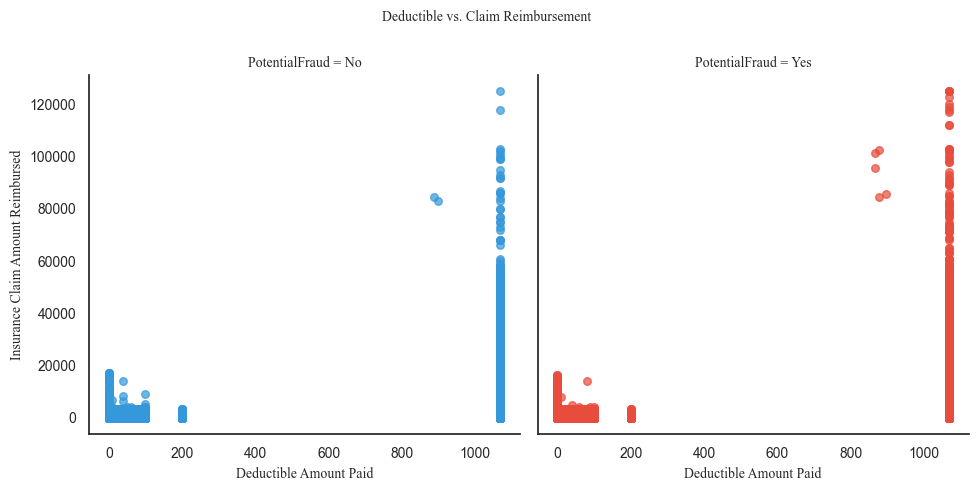

In [196]:
# Deductable vs. Claim Reimbursement in Fraud/Non-Fraud 
plt.figure(figsize=(12, 6), facecolor='white')  # Set figure size and background

sns.lmplot(x='DeductibleAmtPaid', y='InscClaimAmtReimbursed', hue='PotentialFraud',
           col='PotentialFraud', fit_reg=False, data=Data_Train,
           palette={'No': '#3498db', 'Yes': '#e74c3c'},  # Custom colors
           scatter_kws={'alpha': 0.7, 's': 30})  # Adjust scatter plot appearance

plt.subplots_adjust(top=0.85)  # Adjust subplot to add title

plt.suptitle('Deductible vs. Claim Reimbursement', fontsize=10, fontname='Times New Roman')  # Title

for ax in plt.gcf().axes:  # Iterate through axes
    ax.set_xlabel('Deductible Amount Paid', fontsize=10, fontname='Times New Roman')  # X-axis label
    ax.set_ylabel('Insurance Claim Amount Reimbursed', fontsize=10, fontname='Times New Roman')  # Y-axis label
    ax.set_title(ax.get_title(), fontsize=10, fontname='Times New Roman')  # Subplot titles
    ax.tick_params(axis='both', labelsize=10)  # Tick label size


plt.savefig('DeductibleVsClaimReimbursement_Enhanced')
plt.show()

<Figure size 1200x800 with 0 Axes>

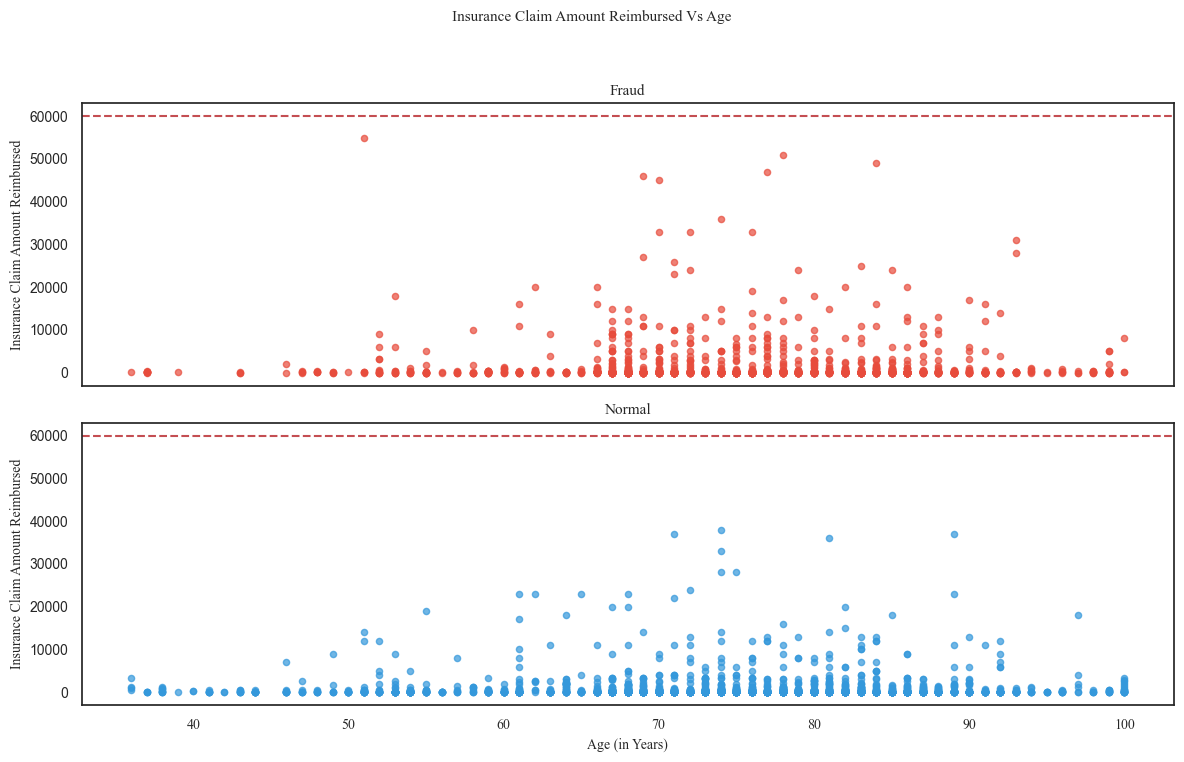

In [197]:
# Age vs. Claim Amount Reimbursed
plt.figure(figsize=(12, 8), facecolor='white')  # Set figure size and background

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, facecolor='white')  # Create subplots, set figure background

f.suptitle('Insurance Claim Amount Reimbursed Vs Age', fontsize=11, fontname='Times New Roman')  # Title

ax1.scatter(Data_Train[Data_Train.PotentialFraud == 'Yes'].Age,
            Data_Train[Data_Train.PotentialFraud == 'Yes'].InscClaimAmtReimbursed,
            s=20, alpha=0.7, color='#e74c3c')  # Fraud scatter plot
ax1.set_title('Fraud', fontsize=11, fontname='Times New Roman')
ax1.axhline(y=60000, color='r', linestyle='--')  # Horizontal line
ax1.set_ylabel('Insurance Claim Amount Reimbursed', fontsize=10, fontname='Times New Roman')
ax1.tick_params(axis='y', labelsize=10)

ax2.scatter(Data_Train[Data_Train.PotentialFraud == 'No'].Age,
            Data_Train[Data_Train.PotentialFraud == 'No'].InscClaimAmtReimbursed,
            s=20, alpha=0.7, color='#3498db')  # Normal scatter plot
ax2.set_title('Normal', fontsize=11, fontname='Times New Roman')
ax2.axhline(y=60000, color='r', linestyle='--')  # Horizontal line
ax2.set_xlabel('Age (in Years)', fontsize=10, fontname='Times New Roman')
ax2.set_ylabel('Insurance Claim Amount Reimbursed', fontsize=10, fontname='Times New Roman')
ax2.tick_params(axis='both', labelsize=10)

plt.xticks(fontname='Times New Roman') #Times new roman for x axis numbers.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout

plt.show()
f.savefig('AgeVsClaimAmtReimbursed_Enhanced')

In [199]:
Train = Train_ProviderWithPatientDetailsdata  # Load training data.
Test = Test_ProviderWithPatientDetailsdata   # Load testing data.

In [200]:
Test_copy = Test  # Create a copy of the test data.

print('Shape of Test Copy :-', Test_copy.shape)  # Print the shape (rows, columns).

Shape of Test Copy :- (135392, 57)


In [201]:
col_merge = Test.columns  # Get column names from the test set.

Test_data = pd.concat([Test, Train[col_merge]])  # Combine test and train data (using test columns).

In [202]:
Test_data.iloc[[135392]]  # Select and display the row at index 135392.

Provider      BeneID   ClaimID ClaimStartDt ClaimEndDt  \
0  PRV51001  BENE102690  CLM49733   2009-05-04 2009-05-18   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   42000          PHY383193          PHY378091   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_IschemicHeart  \
0      PHY389113               4241  ...                         1   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        0                               1                  0   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                   143800                  4272                      880   

  OPAnnualDeductibleAmt Age  WhetherDead  
0                    70 NaN          0.0  

[1 rows x 57 columns]

In [203]:
Train["PerProviderAvg_InscClaimAmtReimbursed"] = Train.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')  # Avg. reimbursement per provider.
Train["PerProviderAvg_DeductibleAmtPaid"] = Train.groupby('Provider')['DeductibleAmtPaid'].transform('mean')  # Avg. deductible per provider.
Train["PerProviderAvg_IPAnnualReimbursementAmt"] = Train.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')  # Avg. IP reimbursement per provider.
Train["PerProviderAvg_IPAnnualDeductibleAmt"] = Train.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')  # Avg. IP deductible per provider.
Train["PerProviderAvg_OPAnnualReimbursementAmt"] = Train.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')  # Avg. OP reimbursement per provider.
Train["PerProviderAvg_OPAnnualDeductibleAmt"] = Train.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')  # Avg. OP deductible per provider.
Train["PerProviderAvg_Age"] = Train.groupby('Provider')['Age'].transform('mean')  # Avg. age per provider.
Train["PerProviderAvg_NoOfMonths_PartACov"] = Train.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')  # Avg. Part A coverage months per provider.
Train["PerProviderAvg_NoOfMonths_PartBCov"] = Train.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')  # Avg. Part B coverage months per provider.
Train["PerProviderAvg_AdmitForDays"] = Train.groupby('Provider')['AdmitForDays'].transform('mean')  # Avg. admit days per provider.


Test["PerProviderAvg_InscClaimAmtReimbursed"] = Test.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')  # Avg. reimbursement per provider in test.
Test["PerProviderAvg_DeductibleAmtPaid"] = Test.groupby('Provider')['DeductibleAmtPaid'].transform('mean')  # Avg. deductible per provider in test.
Test["PerProviderAvg_IPAnnualReimbursementAmt"] = Test.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')  # Avg. IP reimbursement per provider in test.
Test["PerProviderAvg_IPAnnualDeductibleAmt"] = Test.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')  # Avg. IP deductible per provider in test.
Test["PerProviderAvg_OPAnnualReimbursementAmt"] = Test.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')  # Avg. OP reimbursement per provider in test.
Test["PerProviderAvg_OPAnnualDeductibleAmt"] = Test.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')  # Avg. OP deductible per provider in test.
Test["PerProviderAvg_Age"] = Test.groupby('Provider')['Age'].transform('mean')  # Avg. age per provider in test.
Test["PerProviderAvg_NoOfMonths_PartACov"] = Test.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')  # Avg. Part A coverage months per provider in test.
Test["PerProviderAvg_NoOfMonths_PartBCov"] = Test.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')  # Avg. Part B coverage months per provider in test.
Test["PerProviderAvg_AdmitForDays"] = Test.groupby('Provider')['AdmitForDays'].transform('mean')  # Avg. admit days per provider in test.

In [205]:
print('Train', Train.shape)  # Print shape of the training data.
Train.iloc[:, -10:].head(10)  # Display the last 10 columns of the first 10 rows of the training data.

Train (558211, 68)


PerProviderAvg_InscClaimAmtReimbursed  PerProviderAvg_DeductibleAmtPaid  \
0                                 4185.6                             213.6   
1                                 4185.6                             213.6   
2                                 4185.6                             213.6   
3                                 4185.6                             213.6   
4                                 4185.6                             213.6   
5                                 4185.6                             213.6   
6                                 4185.6                             213.6   
7                                 4185.6                             213.6   
8                                 4185.6                             213.6   
9                                 4185.6                             213.6   

   PerProviderAvg_IPAnnualReimbursementAmt  \
0                                  17606.0   
1                                  17606.0   
2                                  17606.0   
3                                  17606.0   
4                                  17606.0   
5                                  17606.0   
6                                  17606.0   
7                                  17606.0   
8                                  17606.0   
9                                  17606.0   

   PerProviderAvg_IPAnnualDeductibleAmt  \
0                                897.12   
1                                897.12   
2                                897.12   
3                                897.12   
4                                897.12   
5                                897.12   
6                                897.12   
7                                897.12   
8                                897.12   
9                                897.12   

   PerProviderAvg_OPAnnualReimbursementAmt  \
0                                   2615.2   
1                                   2615.2   
2                                   2615.2   
3                                   2615.2   
4                                   2615.2   
5                                   2615.2   
6                                   2615.2   
7                                   2615.2   
8                                   2615.2   
9                                   2615.2   

   PerProviderAvg_OPAnnualDeductibleAmt  PerProviderAvg_Age  \
0                                463.92                 NaN   
1                                463.92                 NaN   
2                                463.92                 NaN   
3                                463.92                 NaN   
4                                463.92                 NaN   
5                                463.92                 NaN   
6                                463.92                 NaN   
7                                463.92                 NaN   
8                                463.92                 NaN   
9                                463.92                 NaN   

   PerProviderAvg_NoOfMonths_PartACov  PerProviderAvg_NoOfMonths_PartBCov  \
0                                12.0                                12.0   
1                                12.0                                12.0   
2                                12.0                                12.0   
3                                12.0                                12.0   
4                                12.0                                12.0   
5                                12.0                                12.0   
6                                12.0                                12.0   
7                                12.0                                12.0   
8                                12.0                                12.0   
9                                12.0                                12.0   

   PerProviderAvg_AdmitForDays  
0                          6.0  
1                          6.0  
2              

In [206]:
print("Test ", Test.shape)  # Print shape of the test data.
Test.iloc[:, -10:].head(10)  # Display the last 10 columns of the first 10 rows of the test data.

Test  (135392, 67)


PerProviderAvg_InscClaimAmtReimbursed  PerProviderAvg_DeductibleAmtPaid  \
0                             262.390244                          1.853659   
1                             262.390244                          1.853659   
2                             262.390244                          1.853659   
3                             262.390244                          1.853659   
4                             262.390244                          1.853659   
5                             262.390244                          1.853659   
6                             262.390244                          1.853659   
7                             262.390244                          1.853659   
8                             262.390244                          1.853659   
9                             262.390244                          1.853659   

   PerProviderAvg_IPAnnualReimbursementAmt  \
0                              5180.926829   
1                              5180.926829   
2                              5180.926829   
3                              5180.926829   
4                              5180.926829   
5                              5180.926829   
6                              5180.926829   
7                              5180.926829   
8                              5180.926829   
9                              5180.926829   

   PerProviderAvg_IPAnnualDeductibleAmt  \
0                            548.253659   
1                            548.253659   
2                            548.253659   
3                            548.253659   
4                            548.253659   
5                            548.253659   
6                            548.253659   
7                            548.253659   
8                            548.253659   
9                            548.253659   

   PerProviderAvg_OPAnnualReimbursementAmt  \
0                              2345.073171   
1                              2345.073171   
2                              2345.073171   
3                              2345.073171   
4                              2345.073171   
5                              2345.073171   
6                              2345.073171   
7                              2345.073171   
8                              2345.073171   
9                              2345.073171   

   PerProviderAvg_OPAnnualDeductibleAmt  PerProviderAvg_Age  \
0                             677.95122           61.333333   
1                             677.95122           61.333333   
2                             677.95122           61.333333   
3                             677.95122           61.333333   
4                             677.95122           61.333333   
5                             677.95122           61.333333   
6                             677.95122           61.333333   
7                             677.95122           61.333333   
8                             677.95122           61.333333   
9                             677.95122           61.333333   

   PerProviderAvg_NoOfMonths_PartACov  PerProviderAvg_NoOfMonths_PartBCov  \
0                            11.82439                                12.0   
1                            11.82439                                12.0   
2                            11.82439                                12.0   
3                            11.82439                                12.0   
4                            11.82439                                12.0   
5                            11.82439                                12.0   
6                            11.82439                                12.0   
7                            11.82439                                12.0   
8                            11.82439                                12.0   
9                            11.82439                                12.0   

   PerProviderAvg_AdmitForDays  
0                          NaN  
1                          NaN  
2              

In [210]:
# Grouping by BeneID to calculate average Amounts per beneficiary.
Train["PerBeneIDAvg_InscClaimAmtReimbursed"] = Train.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean') 
Train["PerBeneIDAvg_DeductibleAmtPaid"] = Train.groupby('BeneID')['DeductibleAmtPaid'].transform('mean') 
Train["PerBeneIDAvg_IPAnnualReimbursementAmt"] = Train.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')  
Train["PerBeneIDAvg_IPAnnualDeductibleAmt"] = Train.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')  
Train["PerBeneIDAvg_OPAnnualReimbursementAmt"] = Train.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')  
Train["PerBeneIDAvg_OPAnnualDeductibleAmt"] = Train.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')  
Train["PerBeneIDAvg_AdmitForDays"] = Train.groupby('BeneID')['AdmitForDays'].transform('mean') 

Test["PerBeneIDAvg_InscClaimAmtReimbursed"] = Test.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')  
Test["PerBeneIDAvg_DeductibleAmtPaid"] = Test.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')  
Test["PerBeneIDAvg_IPAnnualReimbursementAmt"] = Test.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')  
Test["PerBeneIDAvg_IPAnnualDeductibleAmt"] = Test.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')  
Test["PerBeneIDAvg_OPAnnualReimbursementAmt"] = Test.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')  
Test["PerBeneIDAvg_OPAnnualDeductibleAmt"] = Test.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')  
Test["PerBeneIDAvg_AdmitForDays"] = Test.groupby('BeneID')['AdmitForDays'].transform('mean') 

In [211]:
# Grouping by OtherPhysician and calculating average Amounts per other physician
Train["PerOtherPhysicianAvg_InscClaimAmtReimbursed"] = Train.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean') 
Train["PerOtherPhysicianAvg_DeductibleAmtPaid"] = Train.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')  
Train["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"] = Train.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')  
Train["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"] = Train.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')  
Train["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"] = Train.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')  
Train["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"] = Train.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')  
Train["PerOtherPhysicianAvg_AdmitForDays"] = Train.groupby('OtherPhysician')['AdmitForDays'].transform('mean')  

Test["PerOtherPhysicianAvg_InscClaimAmtReimbursed"] = Test.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean') 
Test["PerOtherPhysicianAvg_DeductibleAmtPaid"] = Test.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')  
Test["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"] = Test.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')  
Test["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"] = Test.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean') 
Test["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"] = Test.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')  
Test["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"] = Test.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')  
Test["PerOtherPhysicianAvg_AdmitForDays"] = Test.groupby('OtherPhysician')['AdmitForDays'].transform('mean')  

In [213]:
# Grouping by OperatingPhysician and computing average Amount for each physician
Train["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Train.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean') 
Train["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Train.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean') 
Train["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Train.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Train.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean') 
Train["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Train.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean') 
Train["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Train.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean') 
Train["PerOperatingPhysicianAvg_AdmitForDays"]=Train.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

Test["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Test.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean') 
Test["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Test.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean') 
Test["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Test.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean') 
Test["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Test.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean') 
Test["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Test.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean') 
Test["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Test.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean') 
Test["PerOperatingPhysicianAvg_AdmitForDays"]=Test.groupby('OperatingPhysician')['AdmitForDays'].transform('mean') 

In [ ]:
# Grouping by AttendingPhysician and computing average amount for each physician
Train["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Train.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean') 
Train["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Train.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean') 
Train["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Train.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean') 
Train["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Train.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean') 
Train["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Train.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean') 
Train["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Train.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerAttendingPhysicianAvg_AdmitForDays"]=Train.groupby('AttendingPhysician')['AdmitForDays'].transform('mean') 

Test["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Test.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean') 
Test["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Test.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean') 
Test["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Test.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean') 
Test["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Test.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean') 
Test["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Test.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean') 
Test["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Test.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean') 
Test["PerAttendingPhysicianAvg_AdmitForDays"]=Test.groupby('AttendingPhysician')['AdmitForDays'].transform('mean') 

In [214]:
# Grouping by Diagnosis Group and computing average amount for each group
Train["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Train.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Train.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Train.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Train.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Train.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Train.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

Test["PerDiagnosisGroupCodeAvg_InscClaimAmtReimbursed"]=Test.groupby('DiagnosisGroupCode')['InscClaimAmtReimbursed'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_DeductibleAmtPaid"]=Test.groupby('DiagnosisGroupCode')['DeductibleAmtPaid'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_IPAnnualReimbursementAmt"]=Test.groupby('DiagnosisGroupCode')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_IPAnnualDeductibleAmt"]=Test.groupby('DiagnosisGroupCode')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_OPAnnualReimbursementAmt"]=Test.groupby('DiagnosisGroupCode')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_OPAnnualDeductibleAmt"]=Test.groupby('DiagnosisGroupCode')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerDiagnosisGroupCodeAvg_AdmitForDays"]=Test.groupby('DiagnosisGroupCode')['AdmitForDays'].transform('mean')

In [215]:
# Grouping by Diagnosis Admission and computing average amount for each admission
Train["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Train.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Train.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Train.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Train.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

Test["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Test.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Test.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Test.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Test.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

In [ ]:
# Grouping by Procedure and computing average amount for each procedure
Train["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Train.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Train["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_1Avg_AdmitForDays"]=Train.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')


Test["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Test.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Test["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_1Avg_AdmitForDays"]=Test.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')

In [217]:
# Grouping by Procedure and computing average amount for each procedure
Train["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Train.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Train["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_2Avg_AdmitForDays"]=Train.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')


Test["PerClmProcedureCode_2Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmProcedureCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmProcedureCode_2Avg_DeductibleAmtPaid"]=Test.groupby('ClmProcedureCode_2')['DeductibleAmtPaid'].transform('mean')
Test["PerClmProcedureCode_2Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_2Avg_AdmitForDays"]=Test.groupby('ClmProcedureCode_2')['AdmitForDays'].transform('mean')

In [218]:
# Grouping by Procedure and computing average amount for each procedure
Train["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Train.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Train["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmProcedureCode_3Avg_AdmitForDays"]=Train.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')


Test["PerClmProcedureCode_3Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmProcedureCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmProcedureCode_3Avg_DeductibleAmtPaid"]=Test.groupby('ClmProcedureCode_3')['DeductibleAmtPaid'].transform('mean')
Test["PerClmProcedureCode_3Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmProcedureCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmProcedureCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmProcedureCode_3Avg_AdmitForDays"]=Test.groupby('ClmProcedureCode_3')['AdmitForDays'].transform('mean')

In [219]:
# Grouping by Diagnosis and computing average amount for each diagnosis
Train["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')

In [220]:
# Grouping by Diagnosis and computing average amount for each diagnosis
Train["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')

In [221]:
# Grouping by Diagnosis and computing average amount for each diagnosis
Train["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')

In [222]:
# Grouping by Diagnosis and computing average amount for each diagnosis
Train["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Train.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Train.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Train.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Train.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Train["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Train.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')


Test["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Test.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Test.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Test.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Test.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Test["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Test.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')

In [224]:
# Claims per provider and attending physician.
Train["ClmCount_Provider_AttendingPhysician"]=Train.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_AttendingPhysician"]=Test.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count') 

# Claims per provider and other physician.
Train["ClmCount_Provider_OtherPhysician"]=Train.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_OtherPhysician"]=Test.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count') 

# Claims per provider and operating physician.
Train["ClmCount_Provider_OperatingPhysician"]=Train.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_OperatingPhysician"]=Test.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count') 

# Claims per provider, beneficiary, and operating physician.
Train["ClmCount_Provider_BeneID_OperatingPhysician"]=Train.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_BeneID_OperatingPhysician"]=Test.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count') 

# Claims per provider, beneficiary, and attending physician.
Train["ClmCount_Provider_BeneID_AttendingPhysician"]=Train.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_BeneID_AttendingPhysician"]=Test.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count') 

# Claims per provider, beneficiary, and other physician.
Train["ClmCount_Provider_BeneID_OtherPhysician"]=Train.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_BeneID_OtherPhysician"]=Test.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count') 

# Claims per provider.
Train["ClmCount_Provider"]=Train.groupby(['Provider'])['ClaimID'].transform('count') 

Test["ClmCount_Provider"]=Test.groupby(['Provider'])['ClaimID'].transform('count') # Claims per provider.

# Claims per provider and beneficiary.
Train["ClmCount_Provider_BeneID"]=Train.groupby(['Provider','BeneID'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_BeneID"]=Test.groupby(['Provider','BeneID'])['ClaimID'].transform('count') 

# Claims per provider, beneficiary, diagnosis 1, and procedure 1.
Train["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Train.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Test.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count') 

# Claims per provider and diagnosis group.
Train["ClmCount_Provider_DiagnosisGroupCode"]=Train.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_DiagnosisGroupCode"]=Test.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count') 

# Claims per provider, beneficiary, attending physician, and diagnosis 1.
Train["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Train.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Test.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count') 

# Claims per provider, beneficiary, attending physician, and procedure 1.
Train["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Train.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Test.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count') 

# Claims per provider, beneficiary, and procedure 1.
Train["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Train.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Test.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count') 

# Claims per provider, beneficiary, and diagnosis 1.
Train["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Train.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Test.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count') 

# Claims per provider and admit diagnosis.
Train["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Train.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Test.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count') 

# Claims per provider and procedure
Train["ClmCount_Provider_ClmProcedureCode_1"]=Train.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')  
Train["ClmCount_Provider_ClmProcedureCode_2"]=Train.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count') 
Train["ClmCount_Provider_ClmProcedureCode_3"]=Train.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count') 
Train["ClmCount_Provider_ClmProcedureCode_4"]=Train.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count') 
Train["ClmCount_Provider_ClmProcedureCode_5"]=Train.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')

Test["ClmCount_Provider_ClmProcedureCode_1"]=Test.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')  
Test["ClmCount_Provider_ClmProcedureCode_2"]=Test.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmProcedureCode_3"]=Test.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmProcedureCode_4"]=Test.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmProcedureCode_5"]=Test.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count') 

# Claims per provider and diagnosis
Train["ClmCount_Provider_ClmDiagnosisCode_1"]=Train.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train["ClmCount_Provider_ClmDiagnosisCode_2"]=Train.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count') 
Train["ClmCount_Provider_ClmDiagnosisCode_3"]=Train.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count') 
Train["ClmCount_Provider_ClmDiagnosisCode_4"]=Train.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count') 
Train["ClmCount_Provider_ClmDiagnosisCode_5"]=Train.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count') 
Train["ClmCount_Provider_ClmDiagnosisCode_6"]=Train.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count') 
Train["ClmCount_Provider_ClmDiagnosisCode_7"]=Train.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count') 
Train["ClmCount_Provider_ClmDiagnosisCode_8"]=Train.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count') 
Train["ClmCount_Provider_ClmDiagnosisCode_9"]=Train.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count') 

Test["ClmCount_Provider_ClmDiagnosisCode_1"]=Test.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmDiagnosisCode_2"]=Test.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmDiagnosisCode_3"]=Test.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmDiagnosisCode_4"]=Test.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmDiagnosisCode_5"]=Test.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmDiagnosisCode_6"]=Test.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmDiagnosisCode_7"]=Test.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmDiagnosisCode_8"]=Test.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count') 
Test["ClmCount_Provider_ClmDiagnosisCode_9"]=Test.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count') 

In [225]:
print('Train_ProviderWithPatientDetailsdata shape-',Train.shape)

Train_ProviderWithPatientDetailsdata shape- (558211, 180)


In [226]:
print('Test_ProviderWithPatientDetailsdata shape-',Test.shape)

Test_ProviderWithPatientDetailsdata shape- (135392, 180)


In [227]:
#Check unique values of ICD Diagnosis Codes

diagnosiscode_2chars=Train['ClmDiagnosisCode_1'].astype(str).str[0:2]

diagnosiscode_2chars.unique()

array(['42', 'V7', '59', '24', '78', '41', '56', '79', '35', '85', '51',
       'V4', '29', '38', 'na', '71', 'V1', '27', '60', '50', '57', '28',
       '91', '55', 'V5', '84', '15', '99', '82', '72', '19', '40', '58',
       '73', '70', '25', '46', '49', '44', '45', '18', '16', '68', '61',
       '47', '20', '33', '31', '88', '48', '53', '43', '36', '32', 'V6',
       '83', 'E8', '22', '17', 'V0', '34', '62', 'V8', '11', '30', '39',
       '80', '93', '52', '89', '23', '94', '54', 'V2', '26', '37', '87',
       '21', '69', '81', '90', '12', '92', '63', '64', '95', '66', '13',
       '74', '14', '98', '97', '75', 'E9', '96', '10', '77', '86', '65',
       '67', '76'], dtype=object)

In [228]:
# impute numeric columns with 0

cols1 = Train.select_dtypes([np.number]).columns
cols2 = Train.select_dtypes(exclude = [np.number]).columns

Train[cols1] = Train[cols1].fillna(value=0)
Test[cols1]=Test[cols1].fillna(value=0)
print('Test_ProviderWithPatientDetailsdata shape:',Test.shape)

Test_ProviderWithPatientDetailsdata shape: (135392, 180)


In [229]:
# Lets remove unnecessary columns ,as we grouped based on these columns and derived maximum infromation from them.

cols=Train.columns
cols[:58]

remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD']

Train_category_removed=Train.drop(axis=1,columns=remove_these_columns)
Test_category_removed=Test.drop(axis=1,columns=remove_these_columns)

In [230]:
Train_category_removed.Gender=Train_category_removed.Gender.astype('category')

In [231]:
Test_category_removed.Gender=Test_category_removed.Gender.astype('category')

In [232]:
Train_category_removed=pd.get_dummies(Train_category_removed,columns=['Gender'],drop_first=True)

In [233]:
Test_category_removed=pd.get_dummies(Test_category_removed,columns=['Gender'],drop_first=True)

In [234]:
Train_category_removed.head().T
Test_category_removed.iloc[135391:135393]

Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitForDays  \
135391  PRV57750                      20                0.0           0.0   

        Race  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
135391     1                      0     45     910                   12   

        NoOfMonths_PartBCov  ...  ClmCount_Provider_ClmDiagnosisCode_1  \
135391                   12  ...                                   1.0   

        ClmCount_Provider_ClmDiagnosisCode_2  \
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_3  \
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_4  \
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_5  \
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_6  \
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_7  \
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_8  \
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_9  Gender_2  
135391                                   0.0      True  

[1 rows x 151 columns]

In [ ]:
# Replace values without triggering FutureWarning
Train_category_removed['PotentialFraud'] = Train_category_removed['PotentialFraud'].replace({'Yes': 1, 'No': 0}).astype('int64')

# Check data type and minimum value
print(Train_category_removed['PotentialFraud'].dtypes)
print(Train_category_removed['PotentialFraud'].min())

int64
0


In [236]:
Train_category_removed.PotentialFraud.max()

1

In [237]:
print('Test Shape before removing',Test_category_removed.shape)

Test Shape before removing (135392, 151)


In [238]:
Test_category_removed=Test_category_removed.iloc[:135392]

In [239]:
Test_category_removed.tail()  

Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitForDays  \
135387  PRV57750                      50                0.0           0.0   
135388  PRV57750                       0                0.0           0.0   
135389  PRV57750                     100                0.0           0.0   
135390  PRV57750                      20                0.0           0.0   
135391  PRV57750                      20                0.0           0.0   

        Race  RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
135387     2                      0     45     910                   12   
135388     5                      0     45     910                   12   
135389     1                      0     45     910                   12   
135390     1                      0     45     910                   12   
135391     1                      0     45     910                   12   

        NoOfMonths_PartBCov  ...  ClmCount_Provider_ClmDiagnosisCode_1  \
135387                   12  ...                                   1.0   
135388                   12  ...                                   1.0   
135389                   12  ...                                   6.0   
135390                   12  ...                                   1.0   
135391                   12  ...                                   1.0   

        ClmCount_Provider_ClmDiagnosisCode_2  \
135387                                   0.0   
135388                                   1.0   
135389                                   3.0   
135390                                   1.0   
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_3  \
135387                                   0.0   
135388                                   1.0   
135389                                   1.0   
135390                                   1.0   
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_4  \
135387                                   0.0   
135388                                   1.0   
135389                                   1.0   
135390                                   0.0   
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_5  \
135387                                   0.0   
135388                                   0.0   
135389                                   0.0   
135390                                   0.0   
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_6  \
135387                                   0.0   
135388                                   0.0   
135389                                   0.0   
135390                                   0.0   
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_7  \
135387                                   0.0   
135388                                   0.0   
135389                                   0.0   
135390                                   0.0   
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_8  \
135387                                   0.0   
135388                                   0.0   
135389                                   0.0   
135390                                   0.0   
135391                                   0.0   

        ClmCount_Provider_ClmDiagnosisCode_9  Gender_2  
135387                                   0.0      True  
135388                                   0.0     False  
135389                                   0.0     False  
135390                                   0.0     False  
135391                                   0.0      True  

[5 rows x 151 columns]

In [240]:
Train_category_removed.head()

Provider  PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0  PRV51001               0                   42000             1068.0   
1  PRV51001               0                      90                0.0   
2  PRV51001               0                      20                0.0   
3  PRV51001               0                     100                0.0   
4  PRV51001               0                     200                0.0   

   AdmitForDays  Race  RenalDiseaseIndicator  State  County  \
0          15.0     1                      1      1     160   
1           0.0     1                      1      1     440   
2           0.0     1                      1      1     660   
3           0.0     1                      0      1     440   
4           0.0     1                      0      1     380   

   NoOfMonths_PartACov  ...  ClmCount_Provider_ClmDiagnosisCode_1  \
0                   12  ...                                   1.0   
1                   12  ...                                   1.0   
2                   12  ...                                   1.0   
3                   12  ...                                   1.0   
4                   12  ...                                   1.0   

   ClmCount_Provider_ClmDiagnosisCode_2  ClmCount_Provider_ClmDiagnosisCode_3  \
0                                   2.0                                   1.0   
1                                   0.0                                   0.0   
2                                   2.0                                   0.0   
3                                   0.0                                   0.0   
4                                   1.0                                   1.0   

   ClmCount_Provider_ClmDiagnosisCode_4  ClmCount_Provider_ClmDiagnosisCode_5  \
0                                   1.0                                   1.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   1.0                                   1.0   

   ClmCount_Provider_ClmDiagnosisCode_6  ClmCount_Provider_ClmDiagnosisCode_7  \
0                                   1.0                                   1.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   1.0                                   0.0   

   ClmCount_Provider_ClmDiagnosisCode_8  ClmCount_Provider_ClmDiagnosisCode_9  \
0                                   1.0                                   1.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   Gender_2  
0      True  
1      True  
2     False  
3      True  
4     False  

[5 rows x 151 columns]

In [247]:
data_v1=Train_ProviderWithPatientDetailsdata.select_dtypes(include=['number'])
data_v1.head()
df = data_v1.iloc[:,2:85]

print(df.columns)

Index(['ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'AdmitForDays', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'WhetherDead',
       'PerProviderAvg_InscClaimAmtReimbursed',
       'PerProviderAvg_DeductibleAmtPaid',
       'PerProviderAvg_IPAnnualReimbursementAmt',
       'PerProviderAvg_IPAnnualDeductibleAmt',
       'PerProviderAvg_OPAnnualReimbursementAmt

<Axes: >

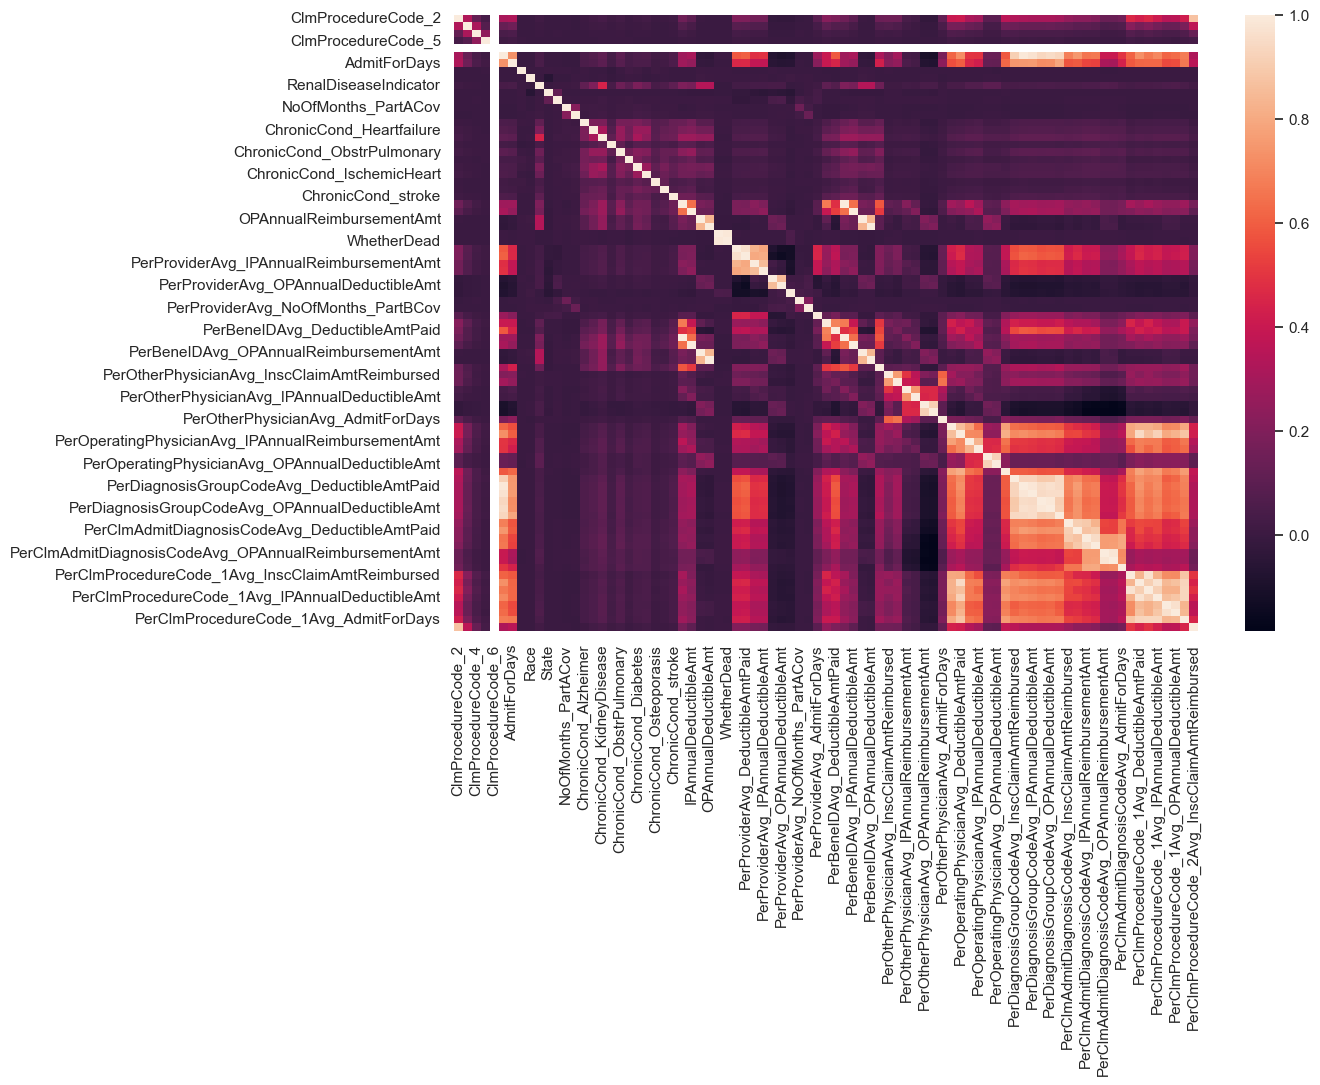

In [248]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr)

In [252]:
dataset_corr = Train_ProviderWithPatientDetailsdata.corr()['PotentialFraud'][:-1]
features_list = dataset_corr[abs(dataset_corr) > 0].sort_values(ascending=False)
print("There is {} correlated values with Potential Fraud:\n{}".format(len(features_list), features_list))

There is 178 correlated values with Potential Fraud:
PotentialFraud                                 1.000000
ClmCount_Provider                              0.515476
PerProviderAvg_Age                             0.314055
ClmCount_Provider_AttendingPhysician           0.300484
PerProviderAvg_AdmitForDays                    0.292533
                                                 ...   
AttendingPhysician                            -0.016862
ClmCount_Provider_BeneID_AttendingPhysician   -0.021597
OtherPhysician                                -0.022770
State                                         -0.041872
Provider                                      -0.069309
Name: PotentialFraud, Length: 178, dtype: float64


In [249]:
non_numeric_cols = [    "Provider", "PotentialFraud", "BeneID", "ClaimID", "ClaimStartDt", "ClaimEndDt",
                        "InscClaimAmtReimbursed", "AttendingPhysician", "OperatingPhysician", "OtherPhysician",
                        "ClmDiagnosisCode_1", "ClmDiagnosisCode_2", "ClmDiagnosisCode_3", "ClmDiagnosisCode_4",
                        "ClmDiagnosisCode_5", "ClmDiagnosisCode_6", "ClmDiagnosisCode_7", "ClmDiagnosisCode_8",
                        "ClmDiagnosisCode_9", "ClmDiagnosisCode_10", "ClmProcedureCode_1", "ClmProcedureCode_2",
                        "ClmProcedureCode_3", "ClmProcedureCode_4", "ClmProcedureCode_5", "ClmProcedureCode_6",
                        "DeductibleAmtPaid", "ClmAdmitDiagnosisCode", "AdmissionDt", "DischargeDt",
                        "DiagnosisGroupCode", "AdmitForDays", "DOB", "DOD", "Gender", "RenalDiseaseIndicator",
                        "NoOfMonths_PartACov", "NoOfMonths_PartBCov", "ChronicCond_Alzheimer",
                        "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer",
                        "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes",
                        "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis",
                        "ChronicCond_stroke", "IPAnnualReimbursementAmt", "IPAnnualDeductibleAmt",
                        "OPAnnualReimbursementAmt", "OPAnnualDeductibleAmt", "Age", "WhetherDead"
                    ]
for col in non_numeric_cols:
    if col in Train_ProviderWithPatientDetailsdata.columns:
        Train_ProviderWithPatientDetailsdata[col] = Train_ProviderWithPatientDetailsdata[col].astype('category').cat.codes

In [253]:
print(Train_ProviderWithPatientDetailsdata.columns)

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician',
       ...
       'ClmCount_Provider_ClmProcedureCode_5',
       'ClmCount_Provider_ClmDiagnosisCode_1',
       'ClmCount_Provider_ClmDiagnosisCode_2',
       'ClmCount_Provider_ClmDiagnosisCode_3',
       'ClmCount_Provider_ClmDiagnosisCode_4',
       'ClmCount_Provider_ClmDiagnosisCode_5',
       'ClmCount_Provider_ClmDiagnosisCode_6',
       'ClmCount_Provider_ClmDiagnosisCode_7',
       'ClmCount_Provider_ClmDiagnosisCode_8',
       'ClmCount_Provider_ClmDiagnosisCode_9'],
      dtype='object', length=180)


In [254]:
# Define numeric columns
numeric_cols = Train_ProviderWithPatientDetailsdata.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = Train_ProviderWithPatientDetailsdata[numeric_cols].corr()

In [255]:
correlation_with_fraud = correlation_matrix['PotentialFraud'].sort_values(ascending=False)
print(correlation_with_fraud)

PotentialFraud                                 1.000000
ClmCount_Provider                              0.515476
PerProviderAvg_Age                             0.314055
ClmCount_Provider_AttendingPhysician           0.300484
PerProviderAvg_AdmitForDays                    0.292533
                                                 ...   
ClmCount_Provider_BeneID_AttendingPhysician   -0.021597
OtherPhysician                                -0.022770
State                                         -0.041872
Provider                                      -0.069309
ClmProcedureCode_6                                  NaN
Name: PotentialFraud, Length: 180, dtype: float64


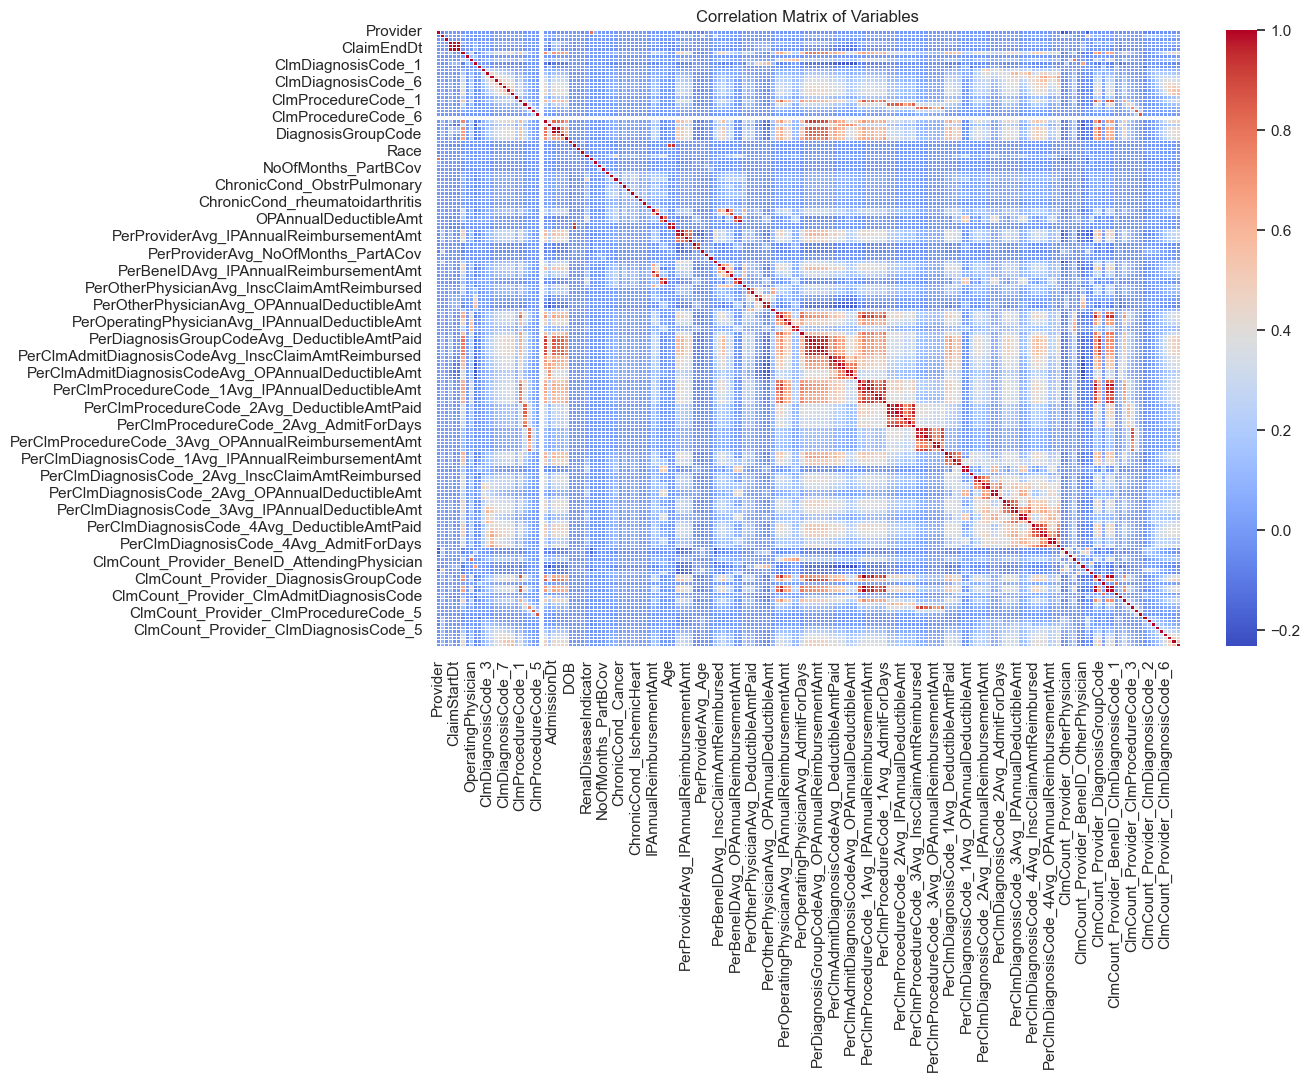

In [256]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Variables")
plt.show()

In [257]:
dataset_corr = Train_ProviderWithPatientDetailsdata.corr()['PotentialFraud'][:-1] # -1 because the latest row is Solar_power_generation
features_list = dataset_corr[abs(dataset_corr) > 0].sort_values(ascending=False)
print("There is {}  correlated values with Potential Fraud:\n{}".format(len(features_list), features_list))

There is 178  correlated values with Potential Fraud:
PotentialFraud                                 1.000000
ClmCount_Provider                              0.515476
PerProviderAvg_Age                             0.314055
ClmCount_Provider_AttendingPhysician           0.300484
PerProviderAvg_AdmitForDays                    0.292533
                                                 ...   
AttendingPhysician                            -0.016862
ClmCount_Provider_BeneID_AttendingPhysician   -0.021597
OtherPhysician                                -0.022770
State                                         -0.041872
Provider                                      -0.069309
Name: PotentialFraud, Length: 178, dtype: float64


In [258]:
remove_columns=['ClmProcedureCode_4','ChronicCond_rheumatoidarthritis','DOB','ClaimEndDt','ClmProcedureCode_5','ChronicCond_Osteoporasis','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','ChronicCond_Depression','ClaimStartDt','DOD','Gender','NoOfMonths_PartBCov',              
'Age','NoOfMonths_PartACov','ChronicCond_Cancer','ChronicCond_Diabetes','ChronicCond_Alzheimer','ClmDiagnosisCode_1','RenalDiseaseIndicator','ChronicCond_IschemicHeart','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','OtherPhysician','BeneID','AttendingPhysician','Provider','ClaimID']

dataset_main = Train_ProviderWithPatientDetailsdata.drop(axis=1,columns=remove_columns)
dataset_main.shape
dataset_main.head()

PotentialFraud  InscClaimAmtReimbursed  OperatingPhysician  \
0               0                     367               19353   
1               0                       9                  -1   
2               0                       2                  -1   
3               0                      10                  -1   
4               0                      20               27165   

   ClmDiagnosisCode_2  ClmDiagnosisCode_3  ClmDiagnosisCode_4  \
0                3067                 811                 443   
1                  -1                  -1                  -1   
2                3067                  -1                  -1   
3                  -1                  -1                  -1   
4                3212                 821                1058   

   ClmDiagnosisCode_5  ClmDiagnosisCode_6  ClmDiagnosisCode_7  \
0                 641                2036                 334   
1                  -1                  -1                  -1   
2                  -1                  -1                  -1   
3                  -1                  -1                  -1   
4                 971                1272                  -1   

   ClmDiagnosisCode_8  ...  ClmCount_Provider_ClmProcedureCode_5  \
0                1828  ...                                   0.0   
1                  -1  ...                                   0.0   
2                  -1  ...                                   0.0   
3                  -1  ...                                   0.0   
4                  -1  ...                                   0.0   

   ClmCount_Provider_ClmDiagnosisCode_1  ClmCount_Provider_ClmDiagnosisCode_2  \
0                                   1.0                                   2.0   
1                                   1.0                                   0.0   
2                                   1.0                                   2.0   
3                                   1.0                                   0.0   
4                                   1.0                                   1.0   

   ClmCount_Provider_ClmDiagnosisCode_3  ClmCount_Provider_ClmDiagnosisCode_4  \
0                                   1.0                                   1.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   1.0                                   1.0   

   ClmCount_Provider_ClmDiagnosisCode_5  ClmCount_Provider_ClmDiagnosisCode_6  \
0                                   1.0                                   1.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   1.0                                   1.0   

   ClmCount_Provider_ClmDiagnosisCode_7  ClmCount_Provider_ClmDiagnosisCode_8  \
0                                   1.0                                   1.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   ClmCount_Provider_ClmDiagnosisCode_9  
0                                   1.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  

[5 rows x 152 columns]

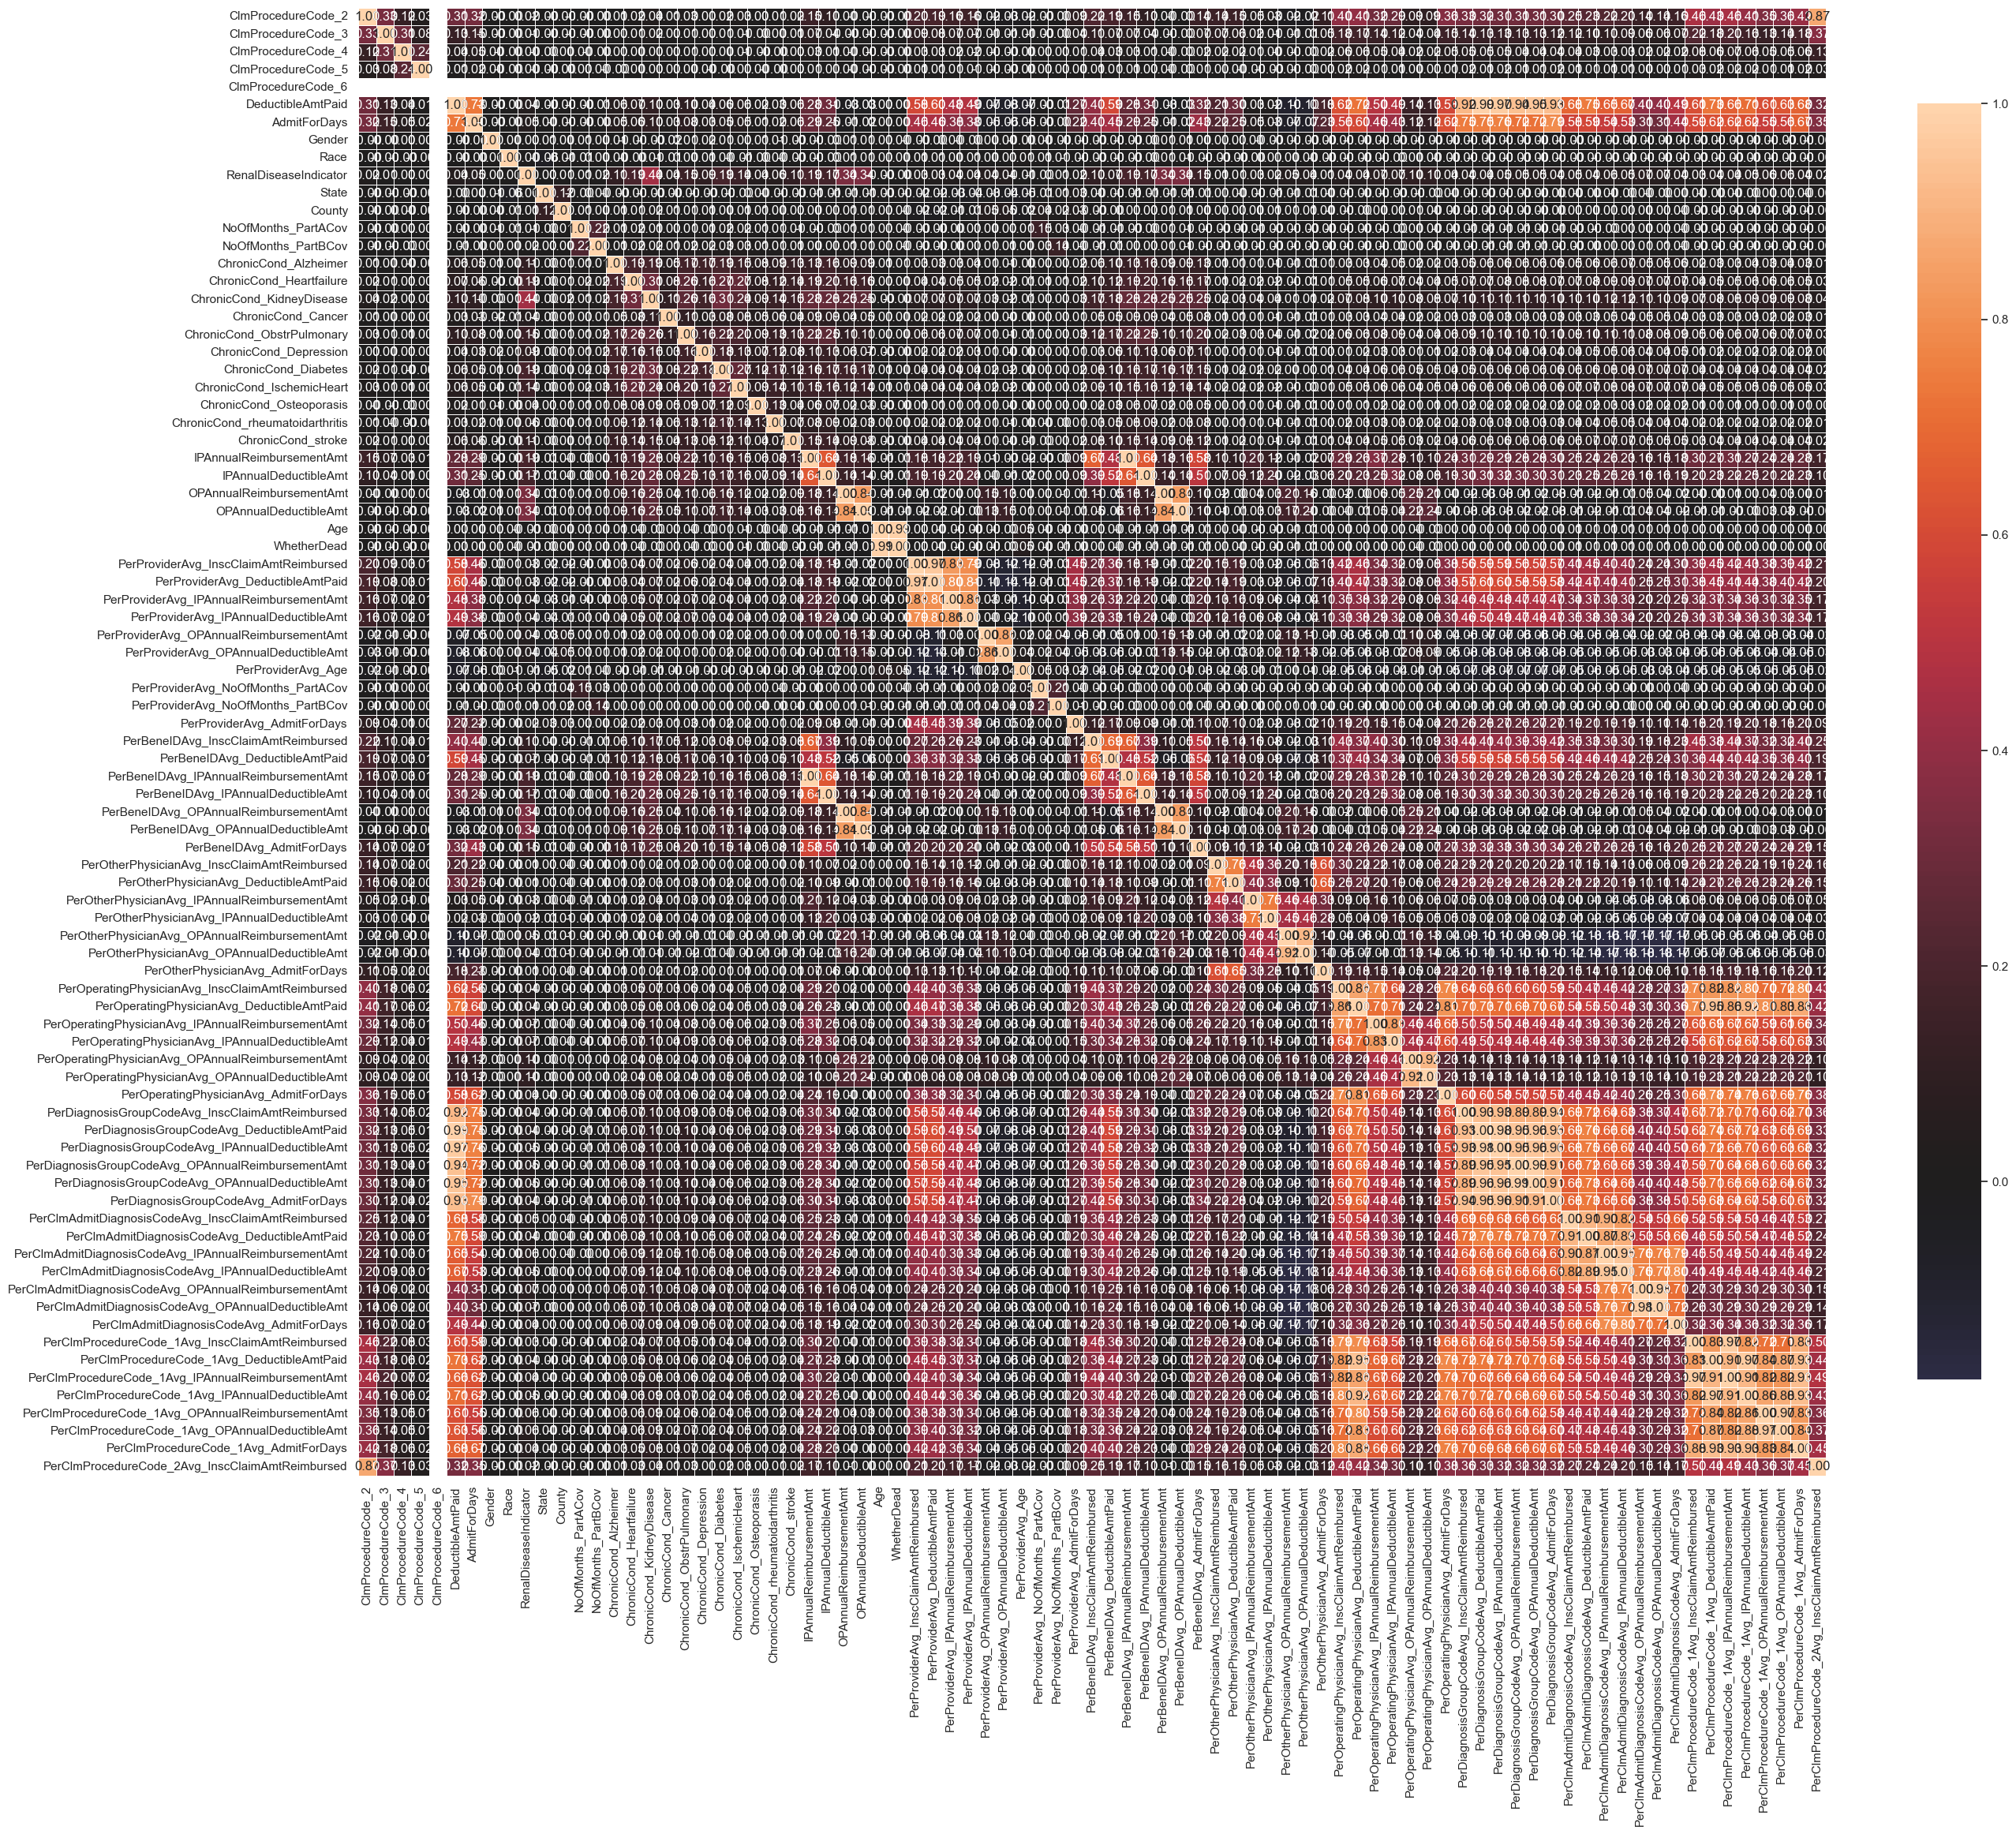

In [259]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

In [260]:
X = dataset_main.iloc[:,1:]
y = dataset_main.iloc[:,0]

In [261]:
X.head()

InscClaimAmtReimbursed  OperatingPhysician  ClmDiagnosisCode_2  \
0                     367               19353                3067   
1                       9                  -1                  -1   
2                       2                  -1                3067   
3                      10                  -1                  -1   
4                      20               27165                3212   

   ClmDiagnosisCode_3  ClmDiagnosisCode_4  ClmDiagnosisCode_5  \
0                 811                 443                 641   
1                  -1                  -1                  -1   
2                  -1                  -1                  -1   
3                  -1                  -1                  -1   
4                 821                1058                 971   

   ClmDiagnosisCode_6  ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0                2036                 334                1828   
1                  -1                  -1                  -1   
2                  -1                  -1                  -1   
3                  -1                  -1                  -1   
4                1272                  -1                  -1   

   ClmDiagnosisCode_9  ...  ClmCount_Provider_ClmProcedureCode_5  \
0                1682  ...                                   0.0   
1                  -1  ...                                   0.0   
2                  -1  ...                                   0.0   
3                  -1  ...                                   0.0   
4                  -1  ...                                   0.0   

   ClmCount_Provider_ClmDiagnosisCode_1  ClmCount_Provider_ClmDiagnosisCode_2  \
0                                   1.0                                   2.0   
1                                   1.0                                   0.0   
2                                   1.0                                   2.0   
3                                   1.0                                   0.0   
4                                   1.0                                   1.0   

   ClmCount_Provider_ClmDiagnosisCode_3  ClmCount_Provider_ClmDiagnosisCode_4  \
0                                   1.0                                   1.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   1.0                                   1.0   

   ClmCount_Provider_ClmDiagnosisCode_5  ClmCount_Provider_ClmDiagnosisCode_6  \
0                                   1.0                                   1.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   1.0                                   1.0   

   ClmCount_Provider_ClmDiagnosisCode_7  ClmCount_Provider_ClmDiagnosisCode_8  \
0                                   1.0                                   1.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   ClmCount_Provider_ClmDiagnosisCode_9  
0                                   1.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  

[5 rows x 151 columns]

In [262]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: PotentialFraud, dtype: int8

In [263]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std=sc.transform(X)

#print(X_std[0:3,:])
#print(X_teststd[0:3,:])

In [264]:
print('X Shape:',X_std.shape)

X Shape: (558211, 151)


In [265]:
## 'stratify=y' will make sure equal distribution of yes:no in both train and validation
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_std,y,test_size=0.3,random_state=101,stratify=y,shuffle=True)

In [266]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (390747, 151)
y_train : (390747,)
X_val : (167464, 151)
y_val : (167464,)


In [267]:
from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as ``n_samples / (n_classes * np.bincount(y))``.

log.fit(X_train,y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=123)

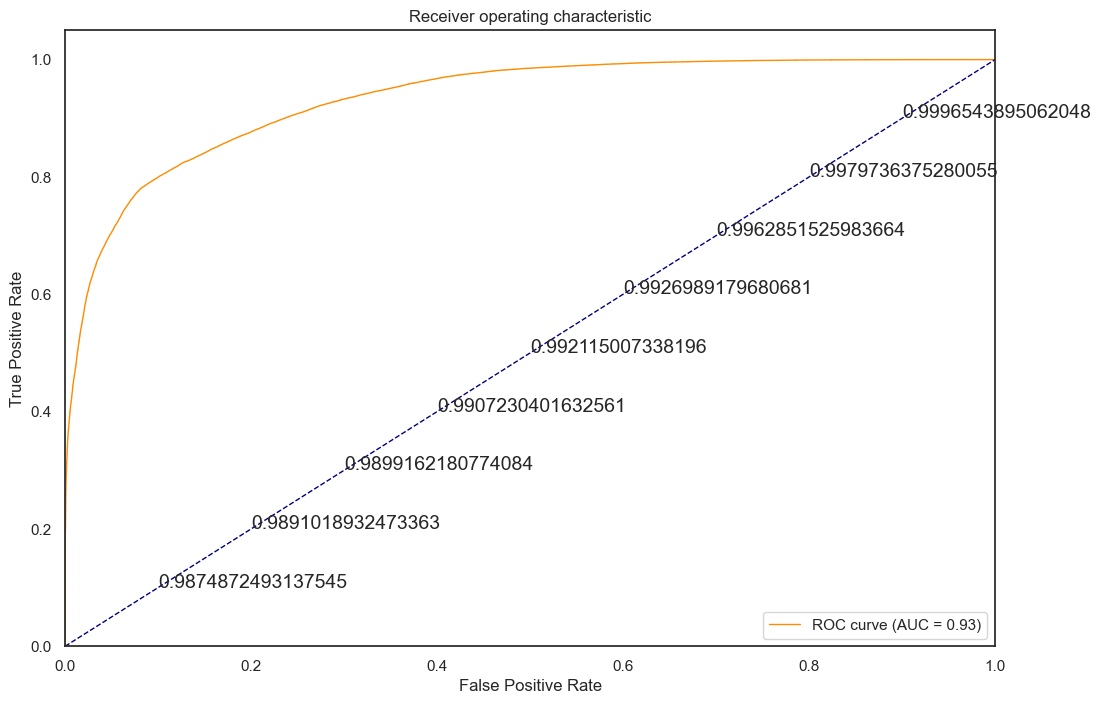

In [268]:
from sklearn.metrics import roc_curve, auc,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,log.predict_proba(X_val)[:,1])         #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [269]:
fpr, tpr, thresholds =roc_curve(y_val, log.predict_proba(X_val)[:,1],pos_label=1)     #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.932607


In [270]:
log_train_pred_60=(log.predict_proba(X_train)[:,1]>0.60).astype(bool)
log_val_pred_60=(log.predict_proba(X_val)[:,1]>0.60).astype(bool)   # set threshold as 0.60

In [271]:
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, log_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, log_val_pred_60,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, log_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, log_val_pred_60)

print("AUC         :",AUC)

print("F1-Score Train  : ",f1_score(y_train, log_train_pred_60))

print("F1-Score Val  : ",f1_score(y_val, log_val_pred_60))

Confusion Matrix Train : 
 [[114117  34840]
 [ 17624 224166]]
Confusion Matrix Val: 
 [[48877 14962]
 [ 7586 96039]]
Accuracy Train:  0.8657340939277844
Accuracy Val:  0.8653561362442077
Sensitivity Train :  0.7661069973213747
Sensitivity Val:  0.7656291608577829
Specificity Train:  0.9271103023284668
Specificity Val:  0.9267937273823884
Kappa Value : 0.7081295277352584
AUC         : 0.8462114441200856
F1-Score Train  :  0.8130945001389394
F1-Score Val  :  0.8125716945686688


In [272]:
## Lets Apply Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [273]:
rfc = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=123,max_depth=4)   # We will set max_depth =4

In [274]:
rfc.fit(X_train,y_train)  #fit the model

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=500,
                       random_state=123)

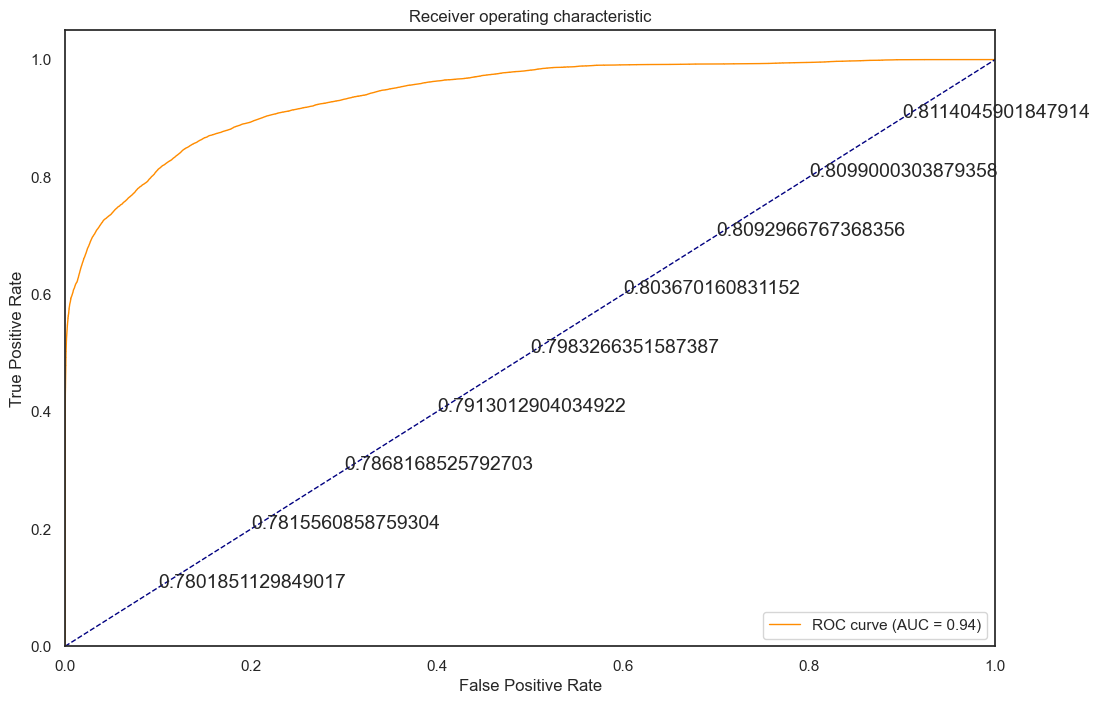

In [275]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, rfc.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})
    
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [276]:
rfc_train_pred = (rfc.predict_proba(X_train)[:,1]>0.5).astype(bool)   # Set threshold to 0.5
rfc_val_pred = (rfc.predict_proba(X_val)[:,1]>0.5).astype(bool)# Set threshold to 0.5

In [277]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,roc_curve

cm0 = confusion_matrix(y_train, rfc_train_pred,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, rfc_val_pred,labels=[1,0])
print('Confusion Matrix Test: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train : ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Test : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

KappaValue=cohen_kappa_score(y_val, rfc_val_pred)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, rfc_val_pred)
print("AUC         :",AUC)


print("F1-Score Train",f1_score(y_train,rfc_train_pred))
print("F1-Score Validation : ",f1_score(y_val, rfc_val_pred))

Confusion Matrix Train : 
 [[126447  22510]
 [ 31249 210541]]
Confusion Matrix Test: 
 [[54214  9625]
 [13470 90155]]
Accuracy Train :  0.8624199290077723
Accuracy Test :  0.8620897625758372
Sensitivity :  0.8492300944563668
Specificity :  0.8700120627261761
Kappa Value : 0.711021084511704
AUC         : 0.8596210785912715
F1-Score Train 0.8246911003642554
F1-Score Validation :  0.8244033362985942


In [278]:
feature_list = list(dataset_main.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list[1:], importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('Top -20 features impacting Random forest model and their importance score :- \n',)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:15]];

Top -20 features impacting Random forest model and their importance score :- 

Variable: ClmCount_Provider    Importance: 0.23
Variable: PerProviderAvg_DeductibleAmtPaid Importance: 0.09
Variable: PerProviderAvg_Age   Importance: 0.09
Variable: PerProviderAvg_NoOfMonths_PartACov Importance: 0.09
Variable: PerProviderAvg_AdmitForDays Importance: 0.09
Variable: PerProviderAvg_NoOfMonths_PartBCov Importance: 0.08
Variable: PerProviderAvg_InscClaimAmtReimbursed Importance: 0.06
Variable: ClmCount_Provider_AttendingPhysician Importance: 0.04
Variable: PerProviderAvg_IPAnnualReimbursementAmt Importance: 0.03
Variable: PerProviderAvg_IPAnnualDeductibleAmt Importance: 0.03
Variable: ClmCount_Provider_ClmDiagnosisCode_1 Importance: 0.03
Variable: PerProviderAvg_OPAnnualReimbursementAmt Importance: 0.02
Variable: PerProviderAvg_OPAnnualDeductibleAmt Importance: 0.02
Variable: ClmCount_Provider_OtherPhysician Importance: 0.01
Variable: ClmCount_Provider_OperatingPhysician Importance: 0.01


In [279]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

In [280]:
X = dataset_main.iloc[:,1:26]
y = dataset_main.iloc[:,0]


train_features,test_features,train_labels,test_labels=train_test_split(X,y,train_size=0.80,random_state=10)
train_features=normalize(train_features)
test_features=normalize(test_features)

In [281]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, algorithm="elkan", max_iter=10000, n_init=10)
kmeans.fit(train_features)
kmeans_predicted_train_labels = kmeans.predict(train_features)
kmeans_predicted_train_labels[:10]

array([2, 3, 0, 2, 2, 2, 3, 3, 1, 1])

In [282]:
centroids = kmeans.cluster_centers_
centroids

array([[ 1.95660000e-02,  1.25712180e-02,  2.64319670e-01,
         4.00066036e-01,  2.25066432e-01,  1.21845406e-01,
         7.59183325e-02,  5.23964295e-02,  3.64440625e-02,
         2.43715879e-02,  3.07573229e-04,  1.53386924e-03,
         6.77766661e-05,  5.60799514e-06,  0.00000000e+00,
         5.94948841e-04,  3.61323768e-01,  3.57051584e-03,
         2.97652655e-03,  6.22559364e-03,  1.26666450e-04,
         9.63787838e-04,  1.87731250e-02,  1.10152795e-01,
         2.14950734e-04],
       [ 8.04994619e-02, -5.70805559e-03,  6.48778573e-03,
        -4.75496977e-03, -6.07756955e-03, -6.20549675e-03,
        -6.21028170e-03, -6.21028170e-03, -6.21028170e-03,
        -6.21028170e-03, -6.21028170e-03,  6.82177115e-06,
         2.31206113e-17, -3.37542629e-18,  0.00000000e+00,
         1.38752781e-03,  5.03456398e-03, -6.17980153e-03,
        -6.18270515e-03, -6.15472060e-03,  1.78831084e-06,
         7.83991971e-03,  1.29096232e-01,  9.39250429e-01,
         1.69954096e-03],
    

In [283]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Predict test labels using kmeans
kmeans_predicted_test_labels = kmeans.predict(test_features)

# Check unique values in test labels
print("Unique values in test_labels:", np.unique(test_labels))
print("Unique values in kmeans_predicted_test_labels:", np.unique(kmeans_predicted_test_labels))

Unique values in test_labels: [0 1]
Unique values in kmeans_predicted_test_labels: [0 1 2 3]


In [284]:
# Predicting the labels for the test features using kmeans
kmeans_predicted_test_labels = kmeans.predict(test_features)

# Calculating confusion matrix for kmeans
confusion_matrix(test_labels, kmeans_predicted_test_labels).ravel()

# Scoring kmeans
kmeans_accuracy_score = accuracy_score(test_labels, kmeans_predicted_test_labels)
kmeans_precison_score = precision_score(test_labels, kmeans_predicted_test_labels, average='macro')
kmeans_recall_score = recall_score(test_labels, kmeans_predicted_test_labels, average='macro')
kmeans_f1_score = f1_score(test_labels, kmeans_predicted_test_labels, average='macro')

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [285]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (K-means prediction code) ...

kmeans_accuracy_score = accuracy_score(test_labels, kmeans_predicted_test_labels)
kmeans_precision_score = precision_score(test_labels, kmeans_predicted_test_labels, average='macro', zero_division=0)
kmeans_recall_score = recall_score(test_labels, kmeans_predicted_test_labels, average='macro', zero_division=0)
kmeans_f1_score = f1_score(test_labels, kmeans_predicted_test_labels, average='macro', zero_division=0)

print(f"Accuracy: {kmeans_accuracy_score}")
print(f"Precision: {kmeans_precision_score}")
print(f"Recall: {kmeans_recall_score}")
print(f"F1-score: {kmeans_f1_score}")

Accuracy: 0.25690818053975617
Precision: 0.24247990110334516
Recall: 0.12749151868581793
F1-score: 0.16516959212399673


In [286]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(test_labels, kmeans_predicted_test_labels)

print("")
print("K-Means")
print("Confusion Matrix")
print(cm)

if cm.shape == (2, 2):
	tn, fp, fn, tp = cm.ravel()
	print("tn =", tn, "fp =", fp)
	print("fn =", fn, "tp =", tp)
else:
	print("Confusion matrix is not 2x2, cannot unpack values.")

print("Scores")
print("Accuracy -->", kmeans_accuracy_score)
print("Precison -->", kmeans_precison_score)
print("Recall -->", kmeans_recall_score)
print("F1 -->", kmeans_f1_score)


K-Means
Confusion Matrix
[[18206 18517 12588 19913]
 [11709 10476  8471 11763]
 [    0     0     0     0]
 [    0     0     0     0]]
Confusion matrix is not 2x2, cannot unpack values.
Scores
Accuracy --> 0.25690818053975617
Precison --> 0.24247990110334516
Recall --> 0.12749151868581793
F1 --> 0.16516959212399673


In [287]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Initialize KNN with kd_tree algorithm and parallel processing
knn = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree", n_jobs=-1)

# Fit the model (Fix: Use .to_numpy() instead of .ravel())
knn.fit(train_features, train_labels.to_numpy())

# Predict labels on test set
knn_predicted_test_labels = knn.predict(test_features)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(test_labels, knn_predicted_test_labels).ravel()

# Compute scores
knn_accuracy_score = accuracy_score(test_labels, knn_predicted_test_labels)
knn_precision_score = precision_score(test_labels, knn_predicted_test_labels, zero_division=0)
knn_recall_score = recall_score(test_labels, knn_predicted_test_labels, zero_division=0)
knn_f1_score = f1_score(test_labels, knn_predicted_test_labels, zero_division=0)

# Print results
print("\nK-Nearest Neighbors")
print("Confusion Matrix")
print(f"TN = {tn}, FP = {fp}")
print(f"FN = {fn}, TP = {tp}")
print("Scores")
print(f"Accuracy  --> {knn_accuracy_score:.4f}")
print(f"Precision --> {knn_precision_score:.4f}")
print(f"Recall    --> {knn_recall_score:.4f}")
print(f"F1 Score  --> {knn_f1_score:.4f}")


K-Nearest Neighbors
Confusion Matrix
TN = 50997, FP = 18227
FN = 25773, TP = 16646
Scores
Accuracy  --> 0.6059
Precision --> 0.4773
Recall    --> 0.3924
F1 Score  --> 0.4307


In [288]:
from sklearn import svm
from sklearn import metrics

In [ ]:
svcmodel= svm.SVC(kernel='linear')

In [ ]:
svcmodel.fit(train_features, train_labels)

In [ ]:
svmpred= svcmodel.predict(test_features)

In [ ]:
print ("Accuracy=",metrics.accuracy_score(test_labels,svmpred))
print ("Precision=",metrics.precision_score(test_labels,svmpred))
print ("Recall=",metrics.recall_score(test_labels,svmpred))